In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv("credit.csv")

In [3]:
data = df.copy()

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
data.shape

(30000, 25)

## Basic Checks


In [8]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

- Except payment columns representing money all of them are categories but saved as int

- data["default payment next month"]   is the traget variable here

## UVA

In [11]:
def plot_num(feature):
    mini = data[feature].min()
    maxi = data[feature].max()
    ran = data[feature].max()-data[feature].min()
    mean = data[feature].mean()
    skew = data[feature].skew()
    kurt = data[feature].kurtosis()
    median = data[feature].median()
    st_dev = data[feature].std()
    points = mean-st_dev, mean+st_dev
    
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=data,x=feature,ax=axes[0])
    sns.distplot(a=data[feature],ax=axes[1],color='#ff4125')
    
    fig.set_size_inches(15,5)
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),round(kurt,2),round(skew,2),(round(mini,2),round(maxi,2),round(ran,2)),round(mean,2),round(median,2)))


In [12]:
def log_mod(y):
      
    sns.distplot(np.sign(y)*(np.log(abs(y) + 1)), hist = False, kde = True,kde_kws = {'shade': True})

In [13]:
def plot_num_log(feature):
    sns.distplot(np.log(data[feature].values), bins=25, kde=True)

def plot_cat(feature):
    sns.countplot(data=data,x=feature)

Numerical == ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

Categorical == ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE' , 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

Target == ['default payment next month']

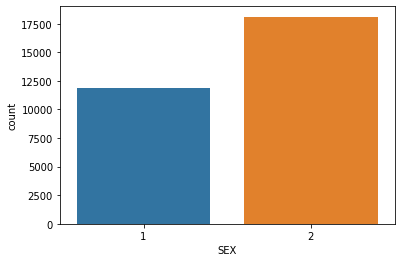

In [14]:
plot_cat('SEX')

- 1 is male and 2 female
- Hypothesis?
> - female would make fraud according to profession!

In [15]:
c = {1 :'Graduate School' , 2:'University'  , 3:'High School' , 4:'Others' , 5:'Others', 6:'Others' , 0:'Others'}
data['Education'] = data['EDUCATION'].map(c)

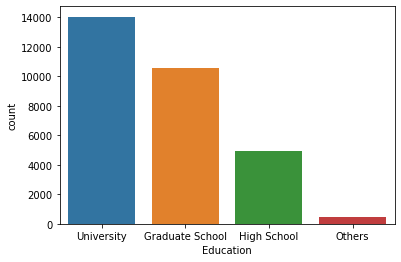

In [16]:
plot_cat('Education')

- (1 = graduate school; 2 = university; 3 = high school; 4 = others)
- High school might do more fraud wrt less money ?
- university and less for graduate school less threat!!
- Others might be more threat.

In [17]:
x = {1:1 , 2:2,3:3 , 0:3}
data["Marriage"] = data["MARRIAGE"].map(x)

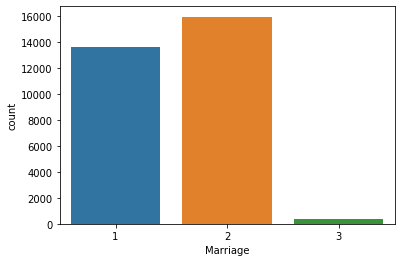

In [18]:
plot_cat('Marriage')

- (1 = married; 2 = single; 3 = others)
- Married would do less fraud as single?
- are others a threat?

In [21]:
data = data.drop(columns=['EDUCATION' , 'MARRIAGE'])

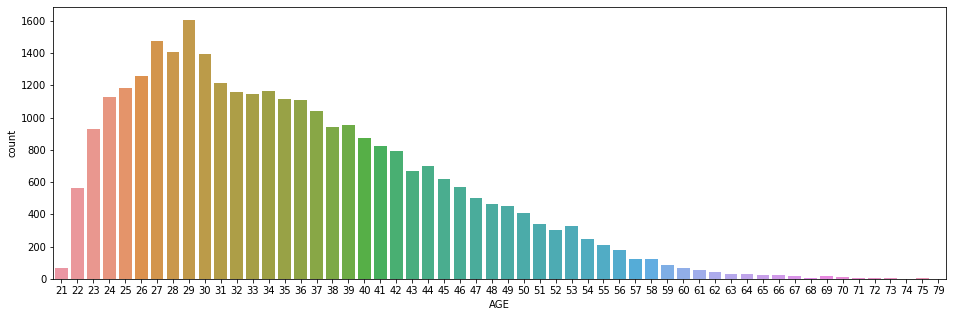

In [22]:
plt.figure(figsize = (16,5))
plot_cat("AGE")

- High age would do less fraud !!
- Middle age ones would do more fraud!!
- 21-37 more fraud and less as age increases , but to check for gender in high age !m

### For Pay
-2 = Advance paid; -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

In [31]:
def value(x):
    for i in data[x].unique():
        
        y = data[data[x] == i] 
        print(i ,(y.shape[0] / data.shape[0])*100)

In [19]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Education', 'Marriage'],
      dtype='object')

In [21]:
pd.data.groupby(["PAY_6"])[["BILL_AMT6" , "PAY_AMT6"]].mean()

,BILL_AMT6,PAY_AMT6
PAY_6,,
-2,2466.856997,3750.429826
-1,9165.957840,7402.379094
0,58249.257522,5322.512158
2,51489.065799,3175.582068
3,37100.701087,473.875000
4,33625.020408,563.020408
5,57042.538462,1000.000000
6,51573.631579,1220.684211
7,2114.260870,0.000000


In [24]:
data.groupby(["PAY_6"])[["BILL_AMT6" , "PAY_AMT6"]].median()

,BILL_AMT6,PAY_AMT6
PAY_6,,
-2,0.0,0.0
-1,1881.5,1140.5
0,31268.0,2000.0
2,30491.5,1300.0
3,19367.0,0.0
4,16780.0,0.0
5,18646.0,0.0
6,1950.0,0.0
7,2400.0,0.0


In [27]:
data.groupby(["PAY_5"])[["BILL_AMT5" , "PAY_AMT5"]].median()

,BILL_AMT5,PAY_AMT5
PAY_5,,
-2,0.0,0.0
-1,1954.0,1170.0
0,31032.0,2000.0
2,30477.5,1457.5
3,20031.0,0.0
4,21629.0,0.0
5,22192.0,0.0
6,11413.0,0.0
7,2400.0,0.0


In [37]:
data.groupby(["PAY_4"])[["BILL_AMT4" , "PAY_AMT4"]].median()

,BILL_AMT4,PAY_AMT4
PAY_4,,
-2,0.0,0.0
-1,2156.0,1132.0
0,38465.0,2000.0
1,185766.0,7550.0
2,28380.0,1100.0
3,27332.5,0.0
4,20779.0,0.0
5,22757.0,0.0
6,24579.0,0.0


In [28]:
data.groupby(["PAY_3"])[["BILL_AMT3" , "PAY_AMT3"]].median()

,BILL_AMT3,PAY_AMT3
PAY_3,,
-2,0.0,0.0
-1,2252.5,1390.0
0,46893.5,2200.0
1,68485.0,4435.0
2,26305.0,1231.0
3,20441.0,0.0
4,31448.0,0.0
5,32308.0,0.0
6,33756.0,0.0


# TO DO
box plot 
ratio of evry month wrt these groupby
ratio for fraud vs 0 vale

-2 16.316666666666666
2 9.22
0 54.28666666666667
-1 19.133333333333333
3 0.6133333333333334
6 0.06333333333333332
4 0.16333333333333333
7 0.15333333333333335
8 0.006666666666666667
5 0.043333333333333335


Text(0.5, 1.0, 'Repayment in April 2005 \n None')

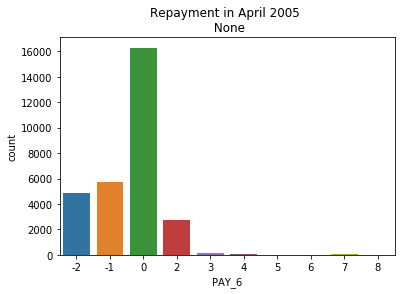

In [41]:
plot_cat( 'PAY_6')
plt.title("Repayment in April 2005 \n {}".format(value('PAY_6')))



- Hypothesis
> - Fraud could be in 0 category.
>- Is there any pattern among all late ones?

-2 15.153333333333332
0 56.489999999999995
-1 18.463333333333335
2 8.753333333333334
3 0.5933333333333333
5 0.05666666666666667
4 0.27999999999999997
7 0.19333333333333333
8 0.0033333333333333335
6 0.013333333333333334


Text(0.5, 1.0, 'Repayment in May 2005 \n None')

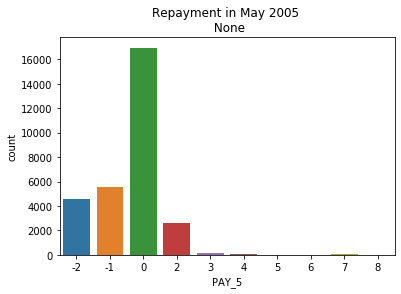

In [40]:
plot_cat( 'PAY_5')
plt.title("Repayment in May 2005 \n {}".format(value('PAY_5')))

## Hypo
- Unidentified behavior might be frauds !
- people with late payment could be potential frauds!

-1 18.956666666666667
0 54.85
-2 14.493333333333332
2 10.530000000000001
3 0.6
4 0.22999999999999998
5 0.11666666666666668
7 0.19333333333333333
6 0.016666666666666666
1 0.006666666666666667
8 0.006666666666666667


Text(0.5, 1.0, 'Repayment in June 2005 \n None')

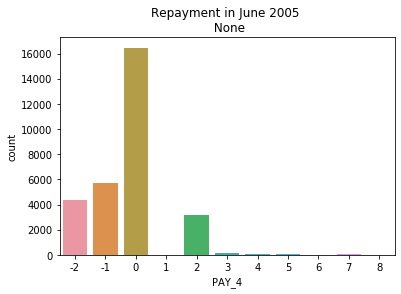

In [48]:
plot_cat( 'PAY_4')
plt.title("Repayment in June 2005 \n {}".format(value('PAY_4')))

- rate of two month late is high!
### Hypo
- do we have high rate for 3 in coming month wrt this month's 2?
- potiential frauders plus 0!!

-1 19.793333333333333
0 52.54666666666667
2 12.73
-2 13.616666666666665
3 0.8
4 0.2533333333333333
6 0.07666666666666667
7 0.09
1 0.013333333333333334
5 0.06999999999999999
8 0.01


Text(0.5, 1.0, 'Repayment in July 2005 \n None')

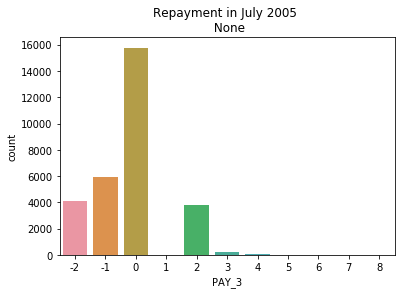

In [49]:
plot_cat( 'PAY_3')
plt.title("Repayment in July 2005 \n {}".format(value('PAY_3')))

- value for 3 has increased , might be fraud behavior
- also 2 has increased wrt last month 1 due late peopple.
#### keep an eye on next 3 and 4
- value of 3 isnt high as analysis from above


2 13.089999999999998
0 52.43333333333333
-1 20.166666666666664
-2 12.606666666666666
3 1.0866666666666667
5 0.08333333333333334
7 0.06666666666666667
4 0.33
1 0.09333333333333334
6 0.04
8 0.0033333333333333335


Text(0.5, 1.0, 'Repayment in August 2005 \n None')

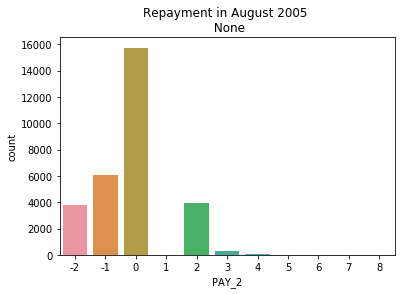

In [50]:
plot_cat( 'PAY_2')
plt.title("Repayment in August 2005 \n {}".format(value('PAY_2')))

- 0 decreased and 1 increased, so might be fraud behavior
#### 0 from june decreased to now so explains 2 ,fraud alert
- 3 increased due to last month 2


2 8.89
-1 18.953333333333333
0 49.123333333333335
-2 9.196666666666667
1 12.293333333333333
3 1.0733333333333333
4 0.2533333333333333
8 0.06333333333333332
7 0.03
5 0.08666666666666667
6 0.03666666666666667


Text(0.5, 1.0, 'Repayment in September 2005 \n None')

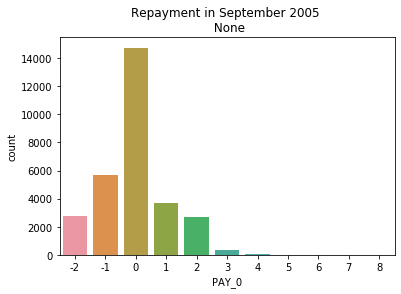

In [54]:
plot_cat( 'PAY_0')
plt.title("Repayment in September 2005 \n {}".format(value('PAY_0')))

## Hypo
- Check for majorly 2,3,4 5 
- Also for 0 
- check for more percetange with comparison to JUNE
- Also Check common behavior between 2,3,4,5

### Conti.

#### Limit bal = Amount of given credit for both single and family

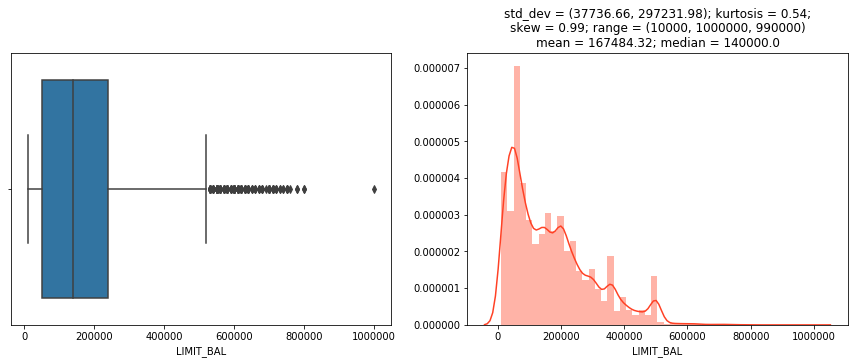

In [62]:
plot_num('LIMIT_BAL')

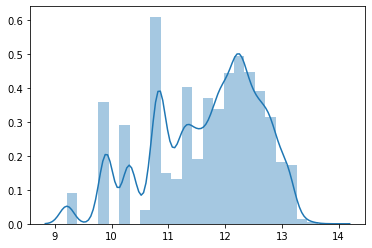

In [27]:
plot_num_log('LIMIT_BAL')

## Hypo
>- How are credit limit distriuuted among gender and education?
> - More people in less credit limit, Porpbably single ?
> - More chances for less credit limit people to be proven fraud!!


####  Bill_Amt = Present Amount of bill statement
- 1-6 descending order of months for sep to april 2005

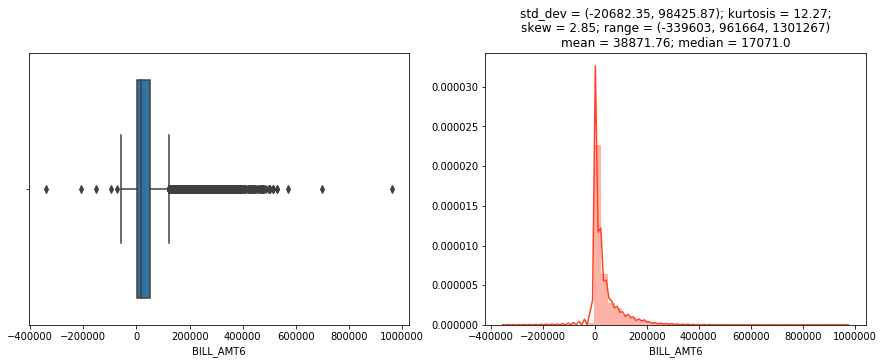

In [64]:
plot_num('BILL_AMT6')

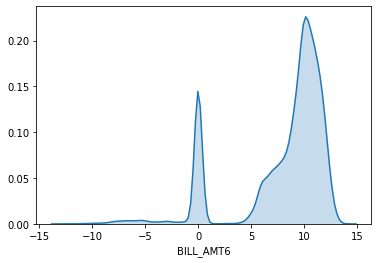

In [65]:
log_mod(data['BILL_AMT6'])

- Hypo 
> - adv - high , so mean - less , so less fraud 


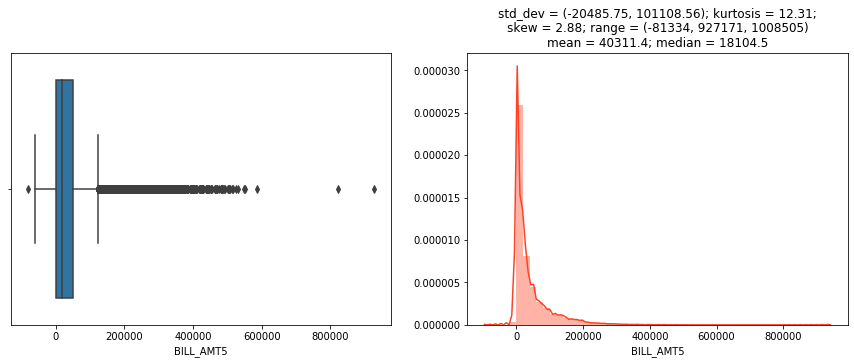

In [67]:
plot_num('BILL_AMT5')

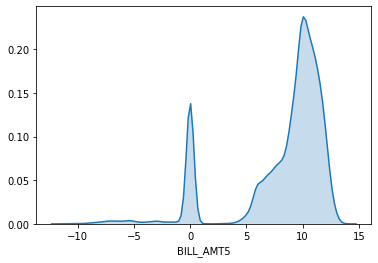

In [68]:
log_mod(data['BILL_AMT5'])

- HYPO
>-Less Fraud in May and april
> - adv pay -- less , so -- more mean nullified by change subseqquent change in higher bal too


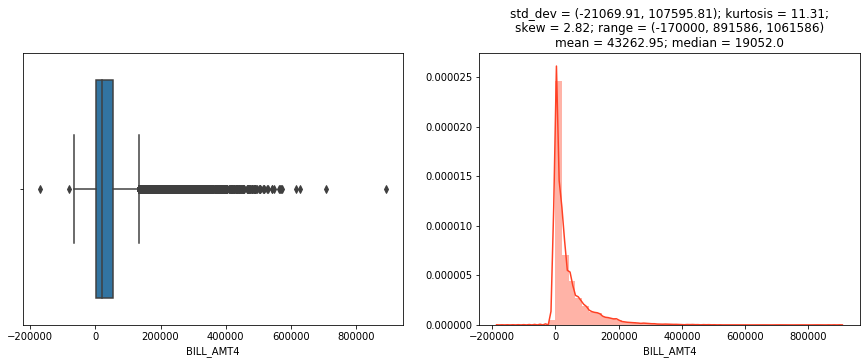

In [69]:
plot_num('BILL_AMT4')

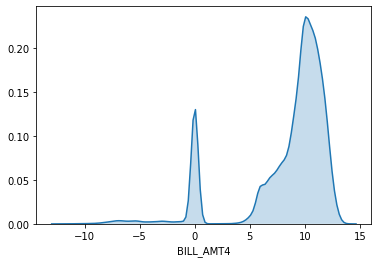

In [74]:
log_mod(data['BILL_AMT4'])

- Hypo
>- More Fraud In June
> - More adv , Less high value Still High Mean


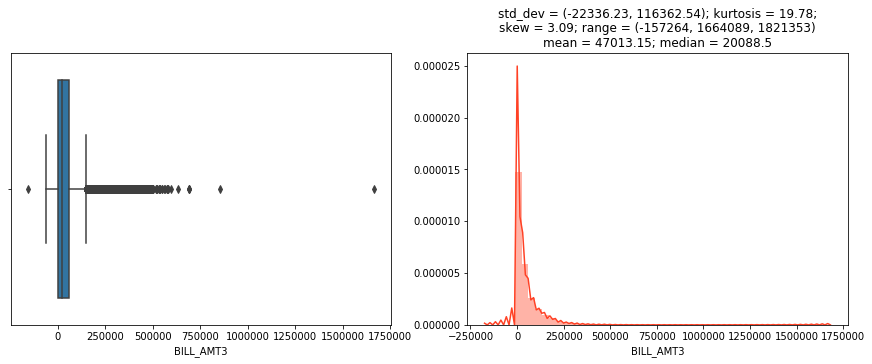

In [33]:
plot_num('BILL_AMT3')

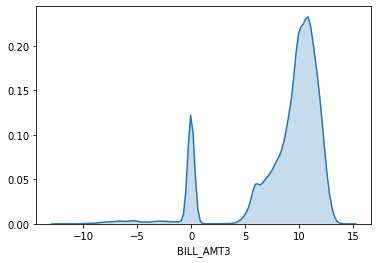

In [34]:
log_mod(data['BILL_AMT3'])

-  **Lowest no of Adv payemnets till now and most left over balance**
- Hypo
>- Most Frauds As highest Max balance and not much change in mean in July

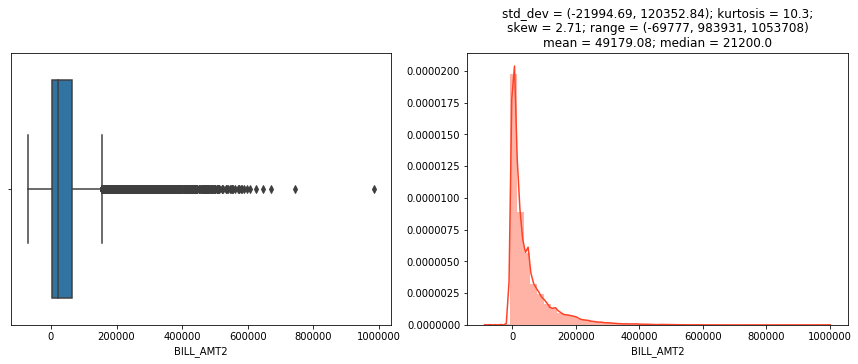

In [75]:
plot_num('BILL_AMT2')

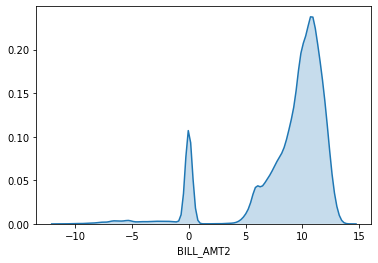

In [76]:
log_mod(data['BILL_AMT2'])

- HYPO
>- Very less current balance , also less adv , so prob less change in mean
> - Less Fraud Rate in August

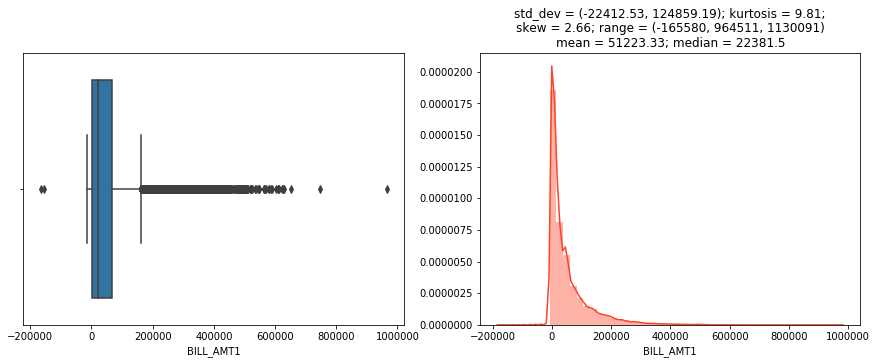

In [94]:
plot_num('BILL_AMT1')

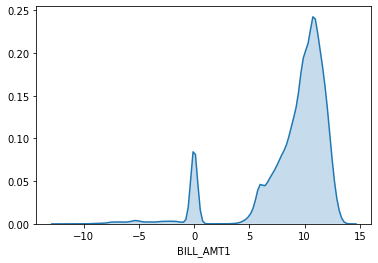

In [78]:
log_mod(data['BILL_AMT1'])

# HELP

## Hypo
- The advance payemnet credit card holders have reducaed significantly in last six months.
- More Frauuds had been increasing wrt Increasing months specially June JuLy

#### Pay_Amt = Amount of previous payment 

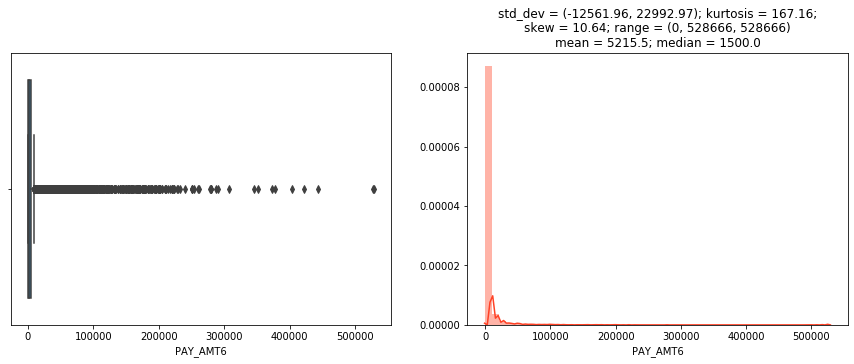

In [107]:
plot_num('PAY_AMT6')

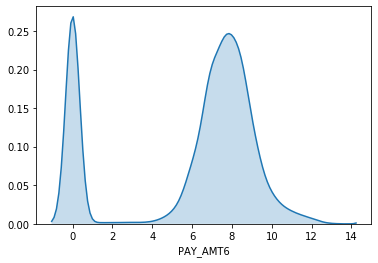

In [108]:
log_mod(data['PAY_AMT6'])

**hypo**
>- many people who paid less !! 
> - check behavior of less payment vali janta

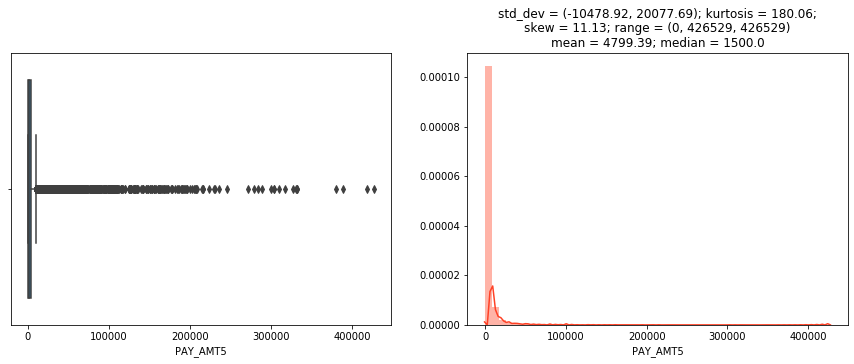

In [109]:
plot_num('PAY_AMT5')

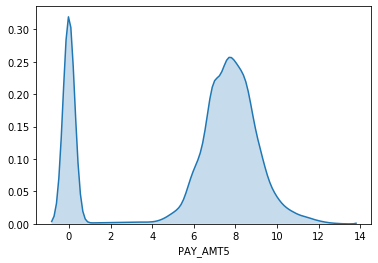

In [110]:
log_mod(data['PAY_AMT5'])

- Less mean wrt last month.
- So less payments and more balance shouuld remain which is confirmed by looking at June's balance mean wrt May

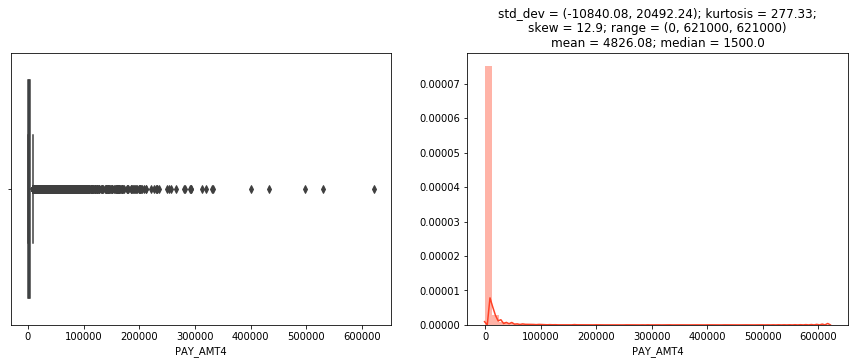

In [111]:
plot_num('PAY_AMT4')

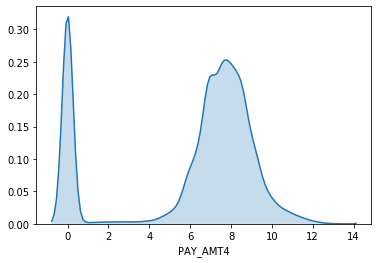

In [112]:
log_mod(data['PAY_AMT4'])

- mean increased slightly 
>- explained by July vala Currrent bal too 

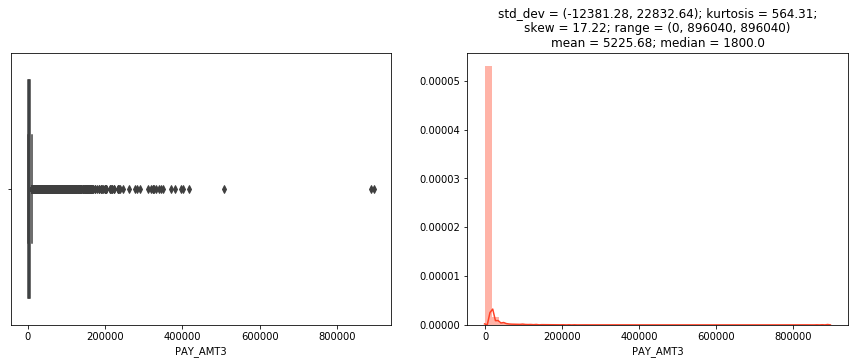

In [119]:
plot_num('PAY_AMT3')

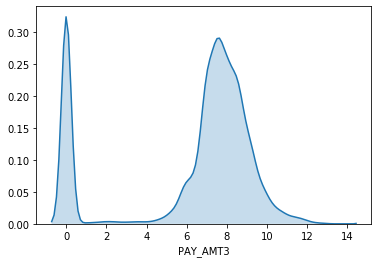

In [113]:
log_mod(data['PAY_AMT3'])

- Grt increase in mean
- But Current balance for August is still high
### Hey hey
- **Potential Fraud alert**
- may be mean is huge here because of advanced payement cutomers mean is good
- check for ????????

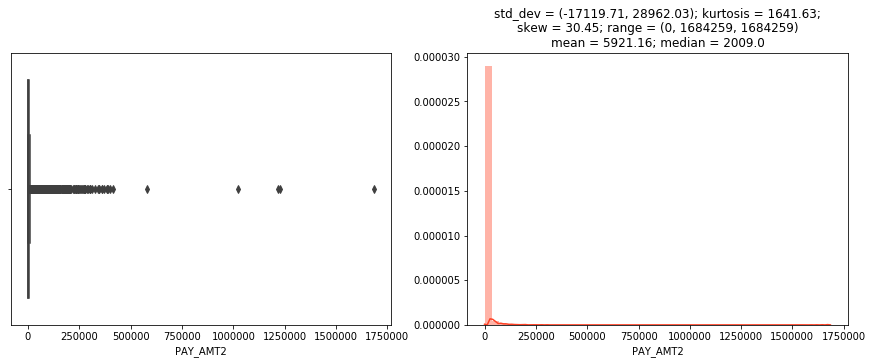

In [120]:
plot_num('PAY_AMT2')

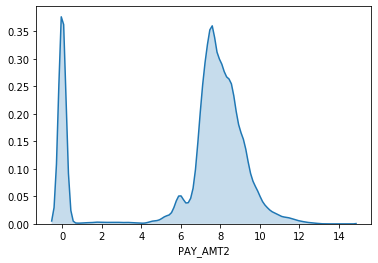

In [115]:
log_mod(data['PAY_AMT2'])

- High Mean explained by less current balance in September

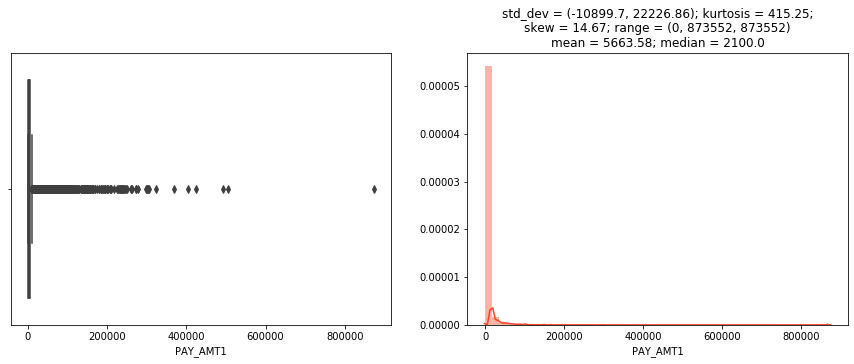

In [121]:
plot_num('PAY_AMT1')

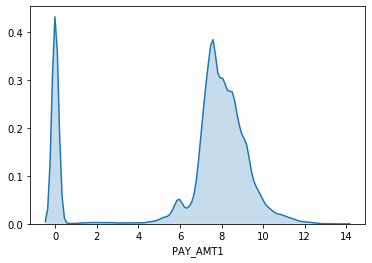

In [117]:
log_mod(data['PAY_AMT1'])

- Compartively less mean... 
- We should have high current balance accordingly
- HYPO
>- Less credt limit poeple are potential frauds who are paying less evry month

1 22.12
0 77.88000000000001


Text(0.5, 1.0, 'None')

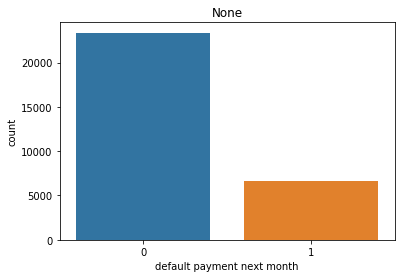

In [56]:
plot_cat('default payment next month')
plt.title("{}".format(value('default payment next month')))

# Bivariate

>### Cat-Cat

# Hypo from Univariate
- SEX
>- Female would make fraud according to profession!
- EDUCATION
>- High school might do more fraud wrt less money ?
> - university and less for graduate school less threat!!
> - Others might be more threat.
- MARRIAGE
>- Married would do less fraud as single?
> - are others a threat?
- AGE
>- High age would do less fraud !!
> - Middle age ones would do more fraud!!
> - 21-37 more fraud and less as age increases , but to check for gender in high age !m



In [51]:
def BVA_cat_cat(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

In [60]:
data.groupby(["Education" , "default payment next month"]).size()

Education        default payment next month
Graduate School  0                              8549
                 1                              2036
High School      0                              3680
                 1                              1237
Others           0                               435
                 1                                33
University       0                             10700
                 1                              3330
dtype: int64

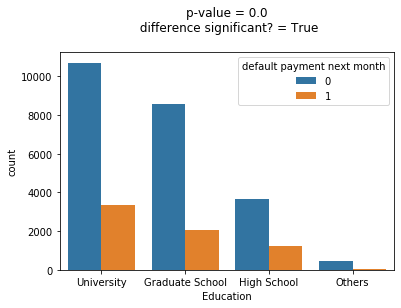

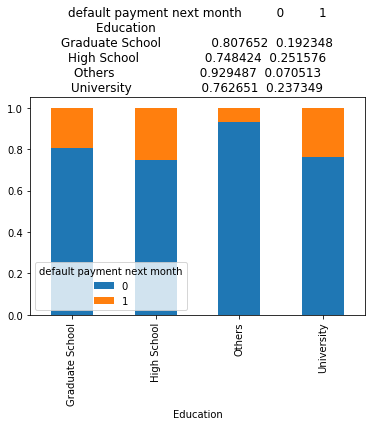

In [53]:
BVA_cat_cat(data , "default payment next month" , "Education")

- Univariate hypo are right
>- High scholl have most ratio wuth 25 percent then university and the graduate
> - Others have least fraud rate.

In [61]:
data.groupby(["SEX" , "default payment next month"]).size()

SEX  default payment next month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
dtype: int64

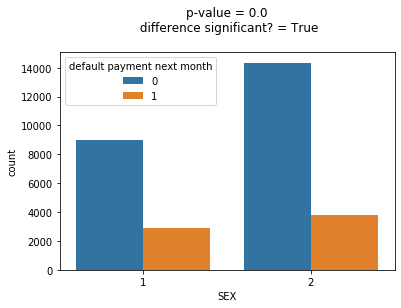

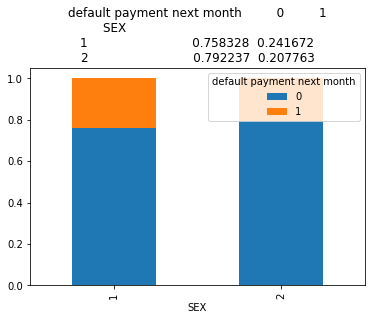

In [55]:
BVA_cat_cat(data , "default payment next month" , "SEX")

- Rejected Uni Analysis
>- Males have more Fraud rate as 24 percent than femals even when females are more in number.
- Hypo
>- Probably we have more SIngle peopple or high schoolers from males.

In [62]:
data.groupby(["Marriage" , "default payment next month"]).size()

Marriage  default payment next month
1         0                             10453
          1                              3206
2         0                             12623
          1                              3341
3         0                               288
          1                                89
dtype: int64

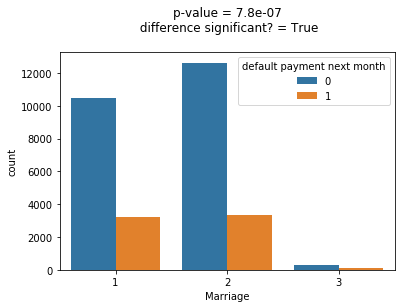

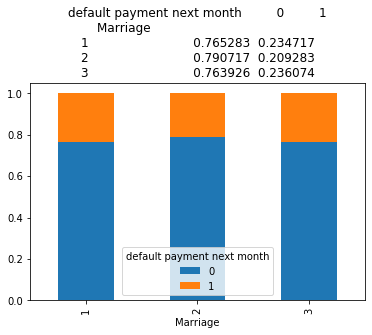

In [56]:
BVA_cat_cat(data , "default payment next month" , "Marriage")

- Reject Uni Hypo
>- Married have more rate of 23 than single with 20
> - And as suspected Others have 23 percent rate even when so less in number 

# HELP

In [68]:
pd.DataFrame(data.groupby(["AGE" , "default payment next month"]).size()).reset_index().head(40)

,AGE,default payment next month,0
0,21,0,53
1,21,1,14
2,22,0,391
3,22,1,169
4,23,0,684
5,23,1,247
6,24,0,827
7,24,1,300
8,25,0,884
9,25,1,302


<Figure size 3960x432 with 0 Axes>

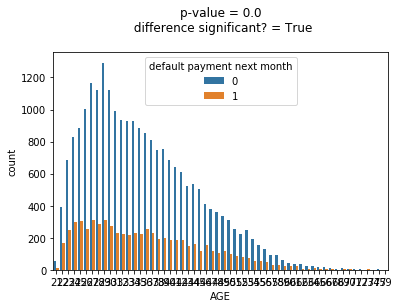

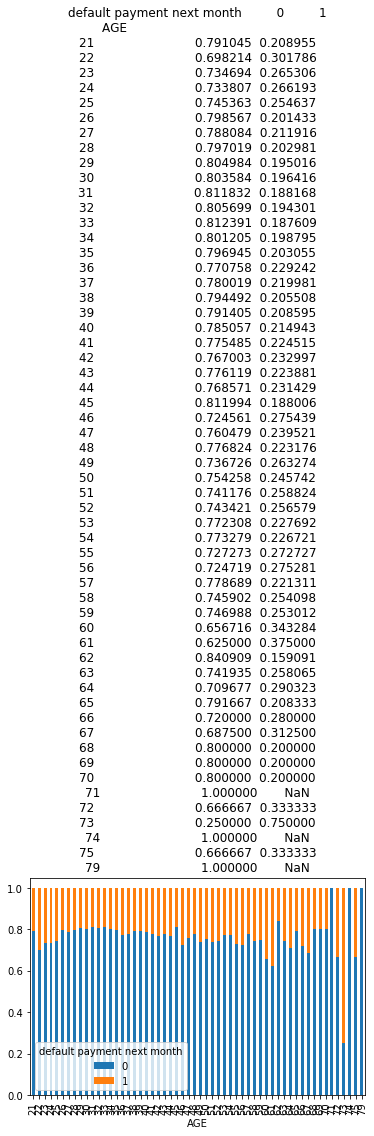

<Figure size 3960x432 with 0 Axes>

In [70]:
BVA_cat_cat(data , "default payment next month" , "AGE")


- HYPO
>- More Fraud Rate in younsters

###  **UNIVARIATE HYPOTHESIS TO CHECK**
>- Fraud could be in 0 category.
> - Is there any pattern among all late ones?
> - Check for majorly 2,3,4 5 
> - Also for 0 
> - check for more percetange with comparison to JUNE
> - Also Check common behavior between 2,3,4,5

In [69]:
data.groupby(["PAY_6" , "default payment next month"]).size()

PAY_6  default payment next month
-2     0                              3914
       1                               981
-1     0                              4765
       1                               975
 0     0                             13217
       1                              3069
 2     0                              1365
       1                              1401
 3     0                                66
       1                               118
 4     0                                18
       1                                31
 5     0                                 6
       1                                 7
 6     0                                 5
       1                                14
 7     0                                 8
       1                                38
 8     1                                 2
dtype: int64

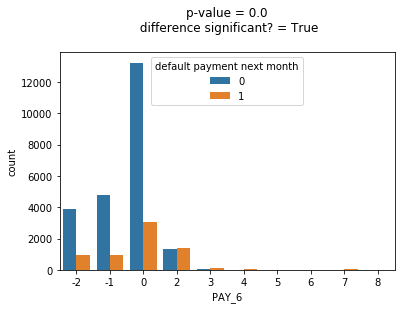

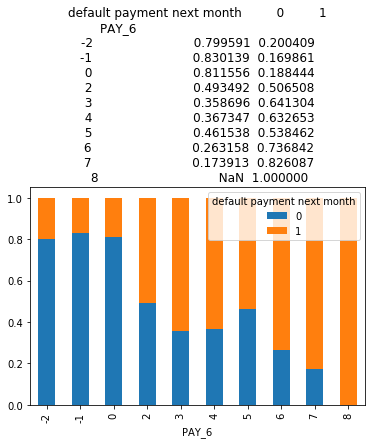

In [57]:
BVA_cat_cat(data , "default payment next month" , "PAY_6")

- Results

>- -2 --  20
> - -1 --  16
> - 0 --  18
> - 2 -- 50
> - 3 -- 64
> - 4 -- 63
> - 5 -- 53
> - 6 -- 73
> - 7 -- 82
> - 8 -- 100
- HYPO
>- 2 month delay should be Threshold for Frauds

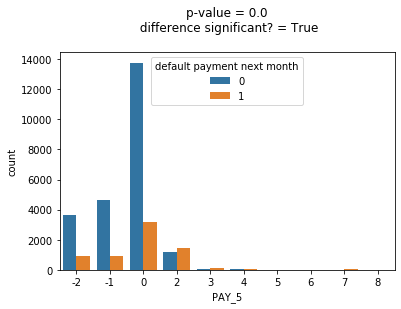

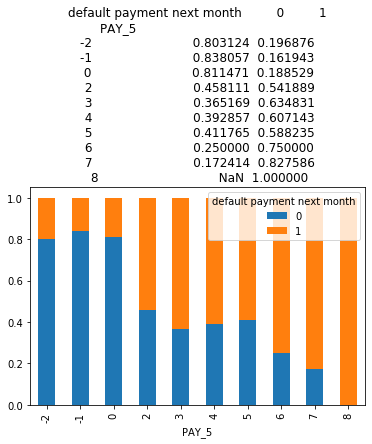

In [58]:
BVA_cat_cat(data , "default payment next month" , "PAY_5")

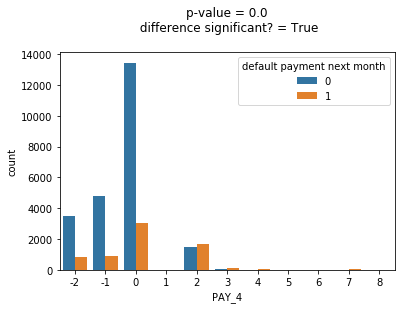

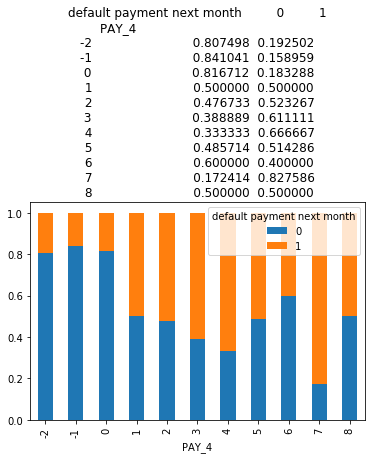

In [59]:
BVA_cat_cat(data , "default payment next month" , "PAY_4")

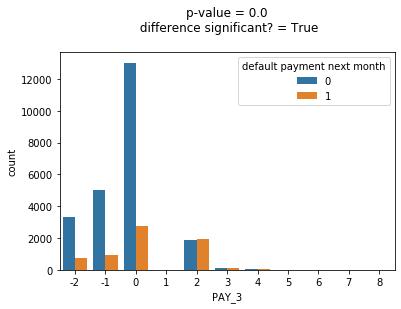

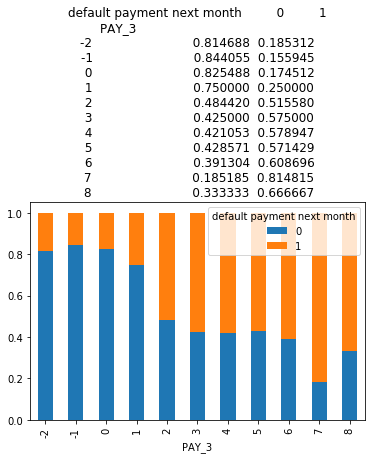

In [60]:
BVA_cat_cat(data , "default payment next month" , "PAY_3")

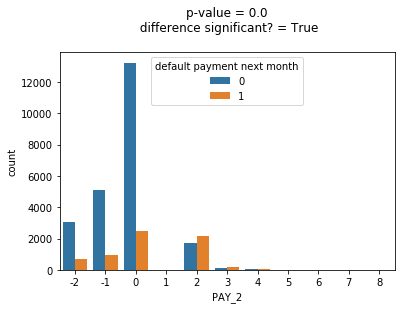

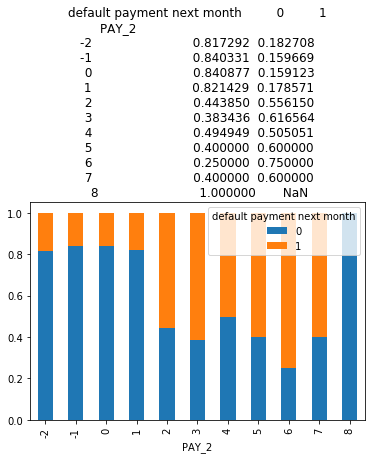

In [61]:
BVA_cat_cat(data , "default payment next month" , "PAY_2")

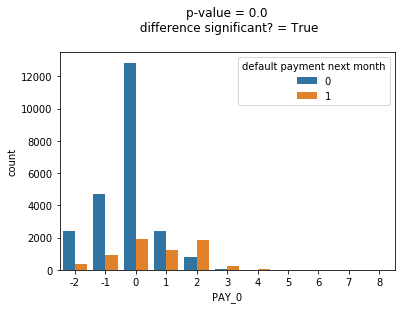

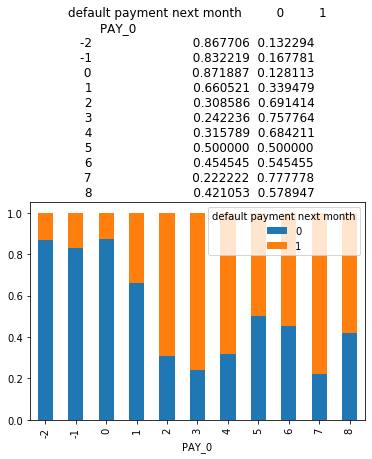

In [62]:
BVA_cat_cat(data , "default payment next month" , "PAY_0")

>## Cat - Cont

In [73]:
def BVA_cat_box(feature):
    sns.boxplot(y=feature, x="default payment next month", data=data)       

def BVA_cat_bar(feature):
    sns.barplot(y=feature, x="default payment next month", data=data)       

In [74]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [75]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

### **UNIVARIATE HYPO TO CHECK**

- CREDIT LIMIT
>- More chances for less credit limit people to be proven fraud!!
> - More people in less credit limit, Probably single ?
> - How are credit limit distriuuted among gender and education?

- CURRENT BALANCE 

>- More Frauuds had been increasing wrt Increasing months specially June JuLy
> - Inference was -- We had alternate relation in current balance with april more and may less
> - Probably the difference in amount for fraud and good people
> - mean is less, so probably less credit limit are more fraud?
> - people with adv payment used money so range decreased and mean increased!!
> - The advance payemnet credit card holders have reduced significantly in last six months.
> - probbaly keep an eye on ***???***


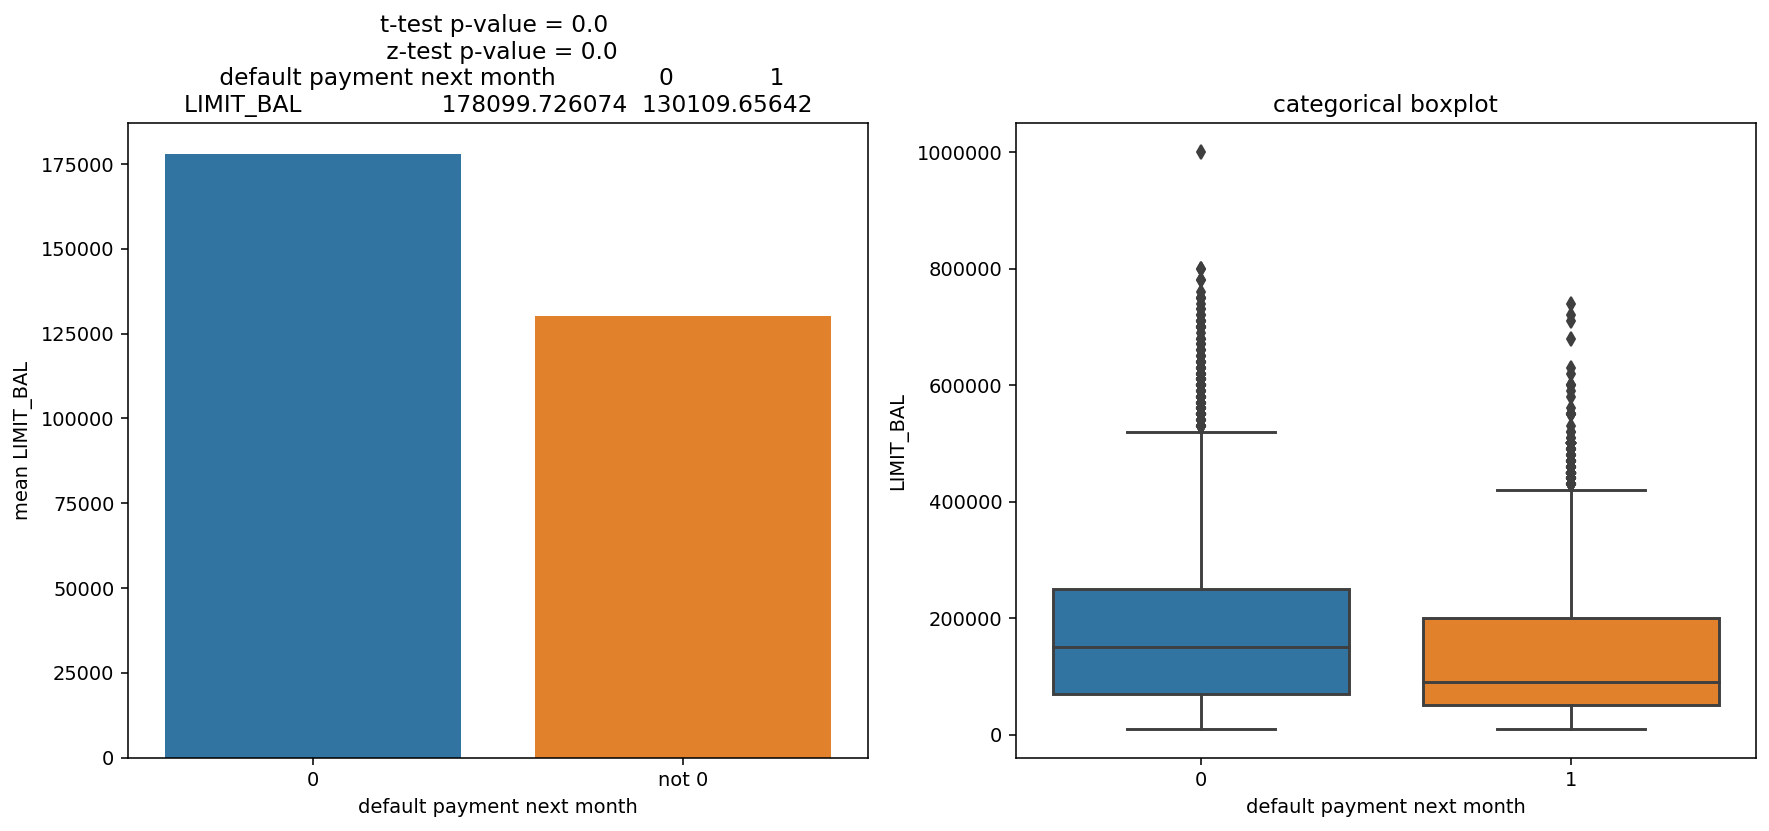

In [66]:
Bivariate_cont_cat(data, 'LIMIT_BAL' , 'default payment next month' , 0)

-INFERENCE
>- Fraud people had less current balance 
> - Probably singles and all
> - But definitely less credit people would be frauds

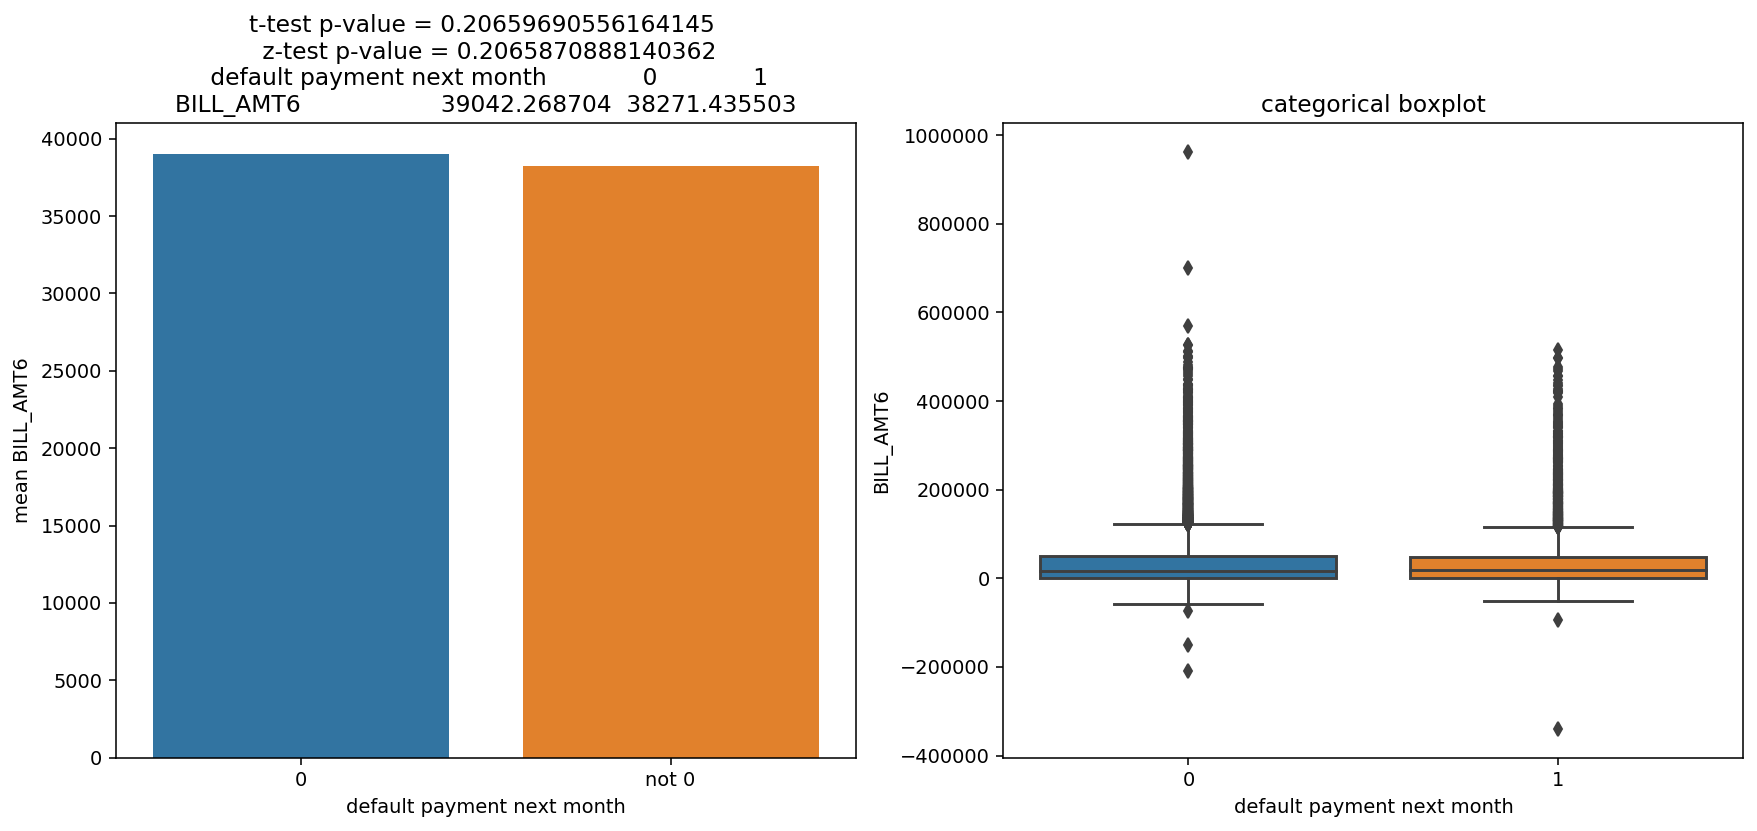

In [38]:
Bivariate_cont_cat(data, 'BILL_AMT6' , 'default payment next month' , 0)

- ACCEPTED UNI ANALYSIS
>- since we had less current balance mean in may, so here means are similarl for both 0 and 1 categories.

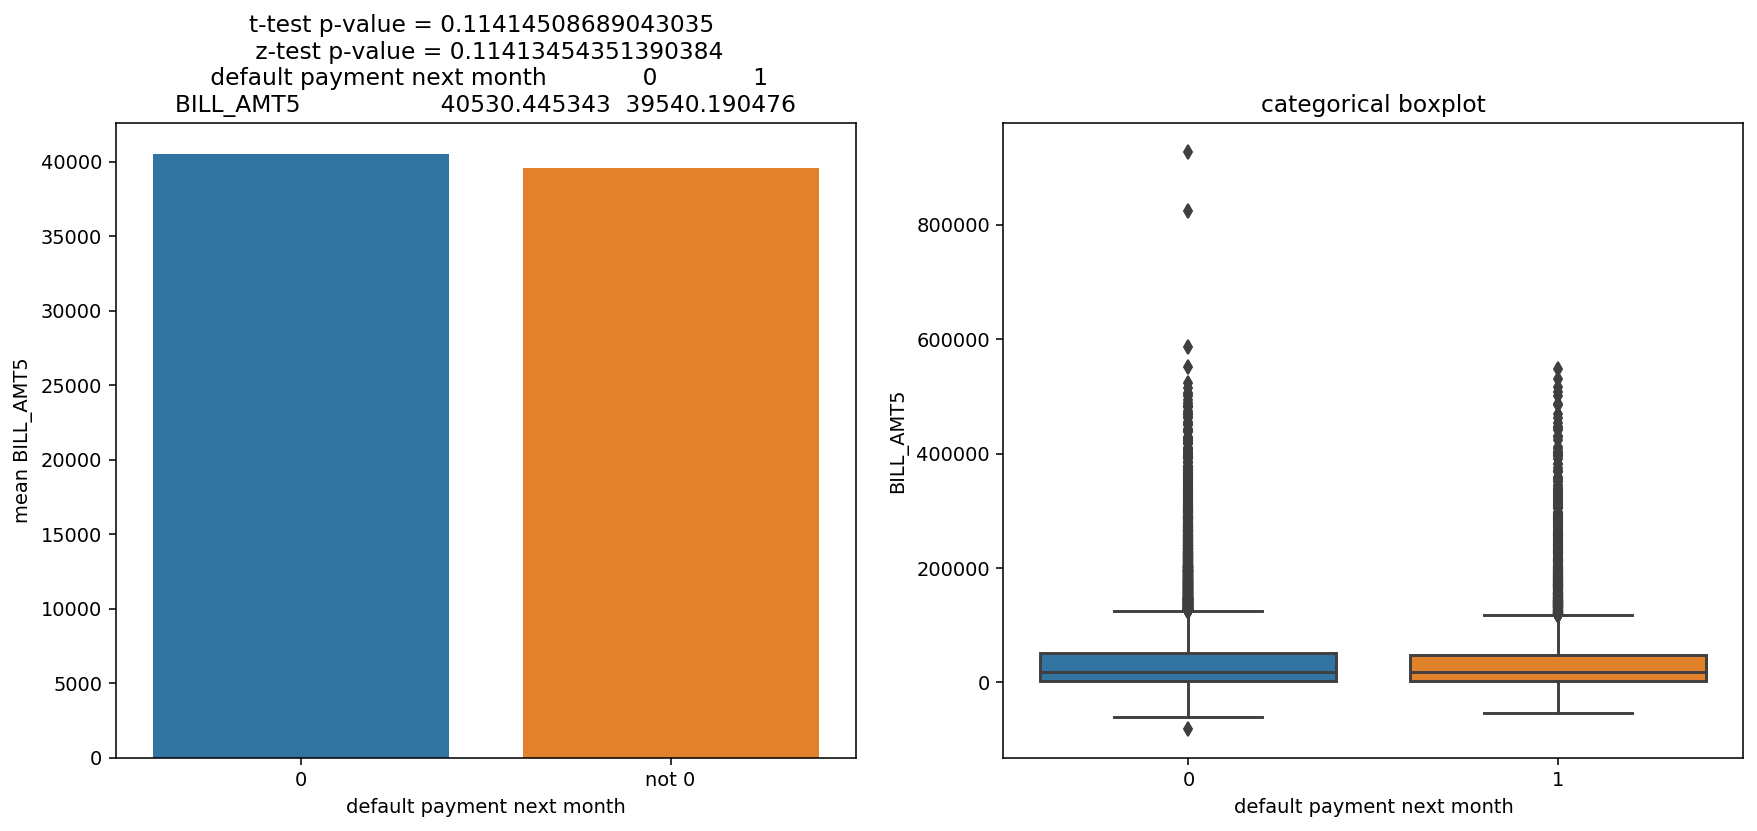

In [39]:
Bivariate_cont_cat(data, 'BILL_AMT5' , 'default payment next month' , 0)

- 2% Difference between values of both

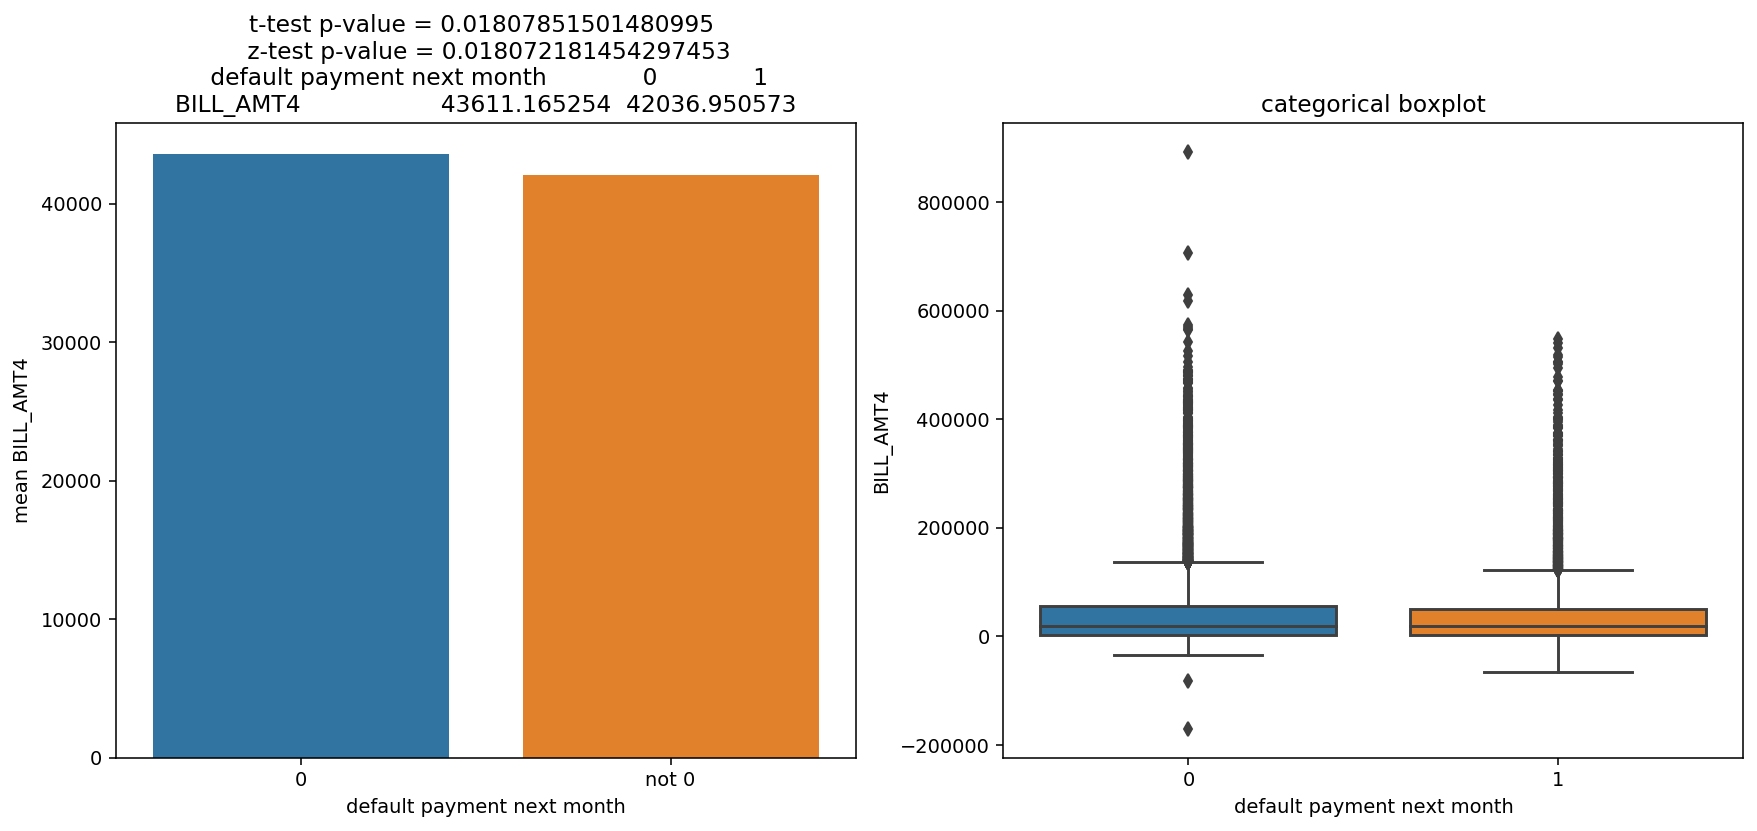

In [40]:
Bivariate_cont_cat(data, 'BILL_AMT4' , 'default payment next month' , 0)

- 3% Change

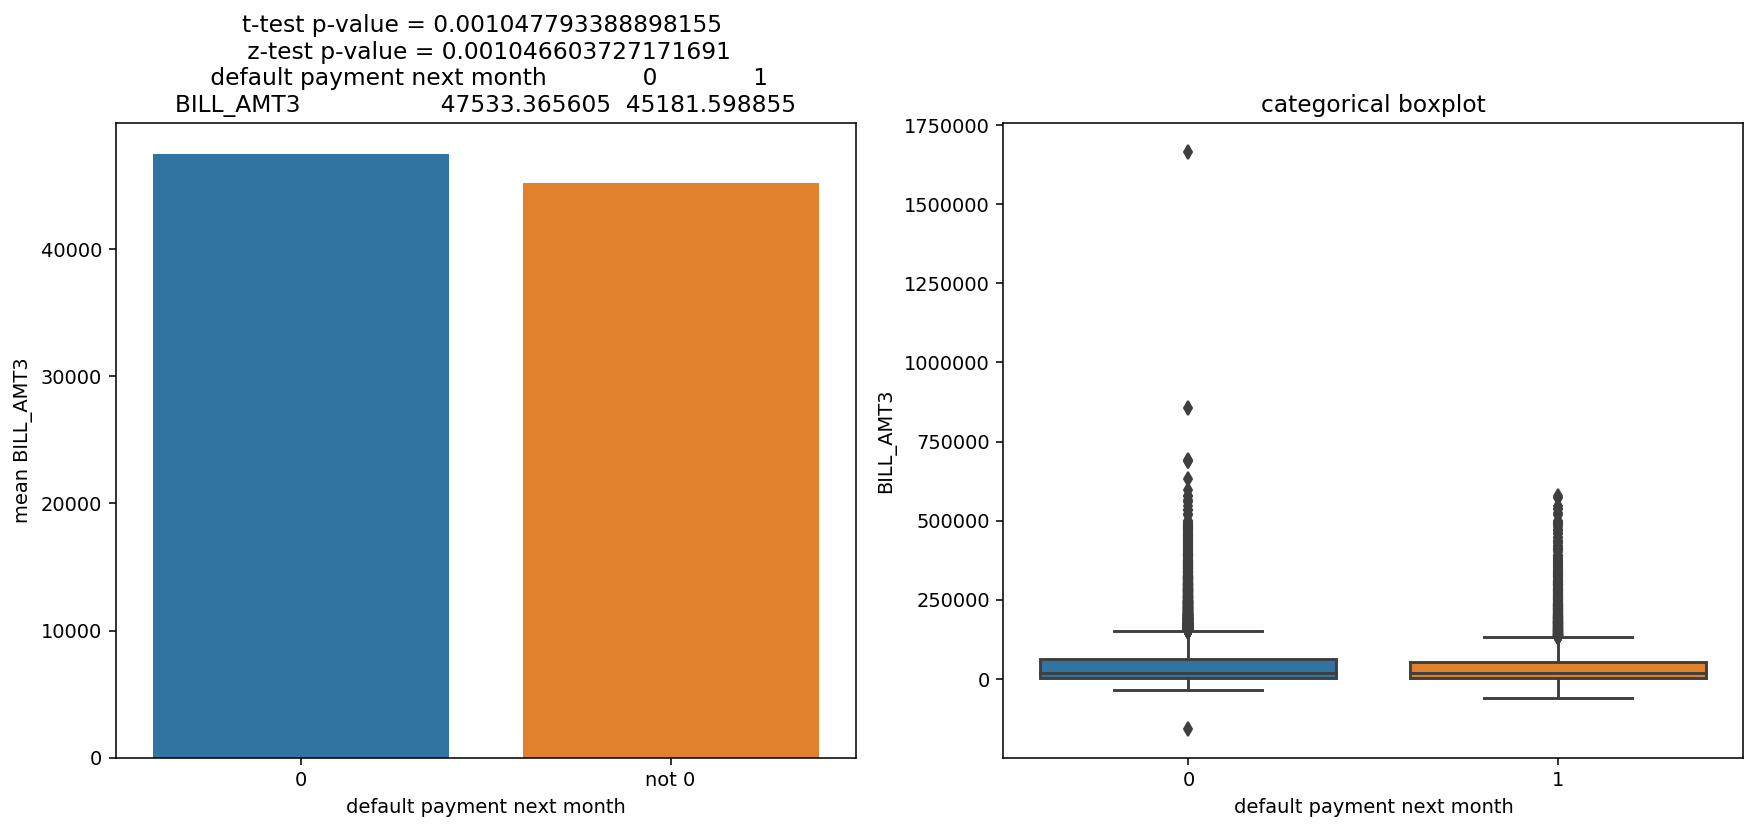

In [76]:
Bivariate_cont_cat(data, 'BILL_AMT3' , 'default payment next month' , 0)

- 4% change

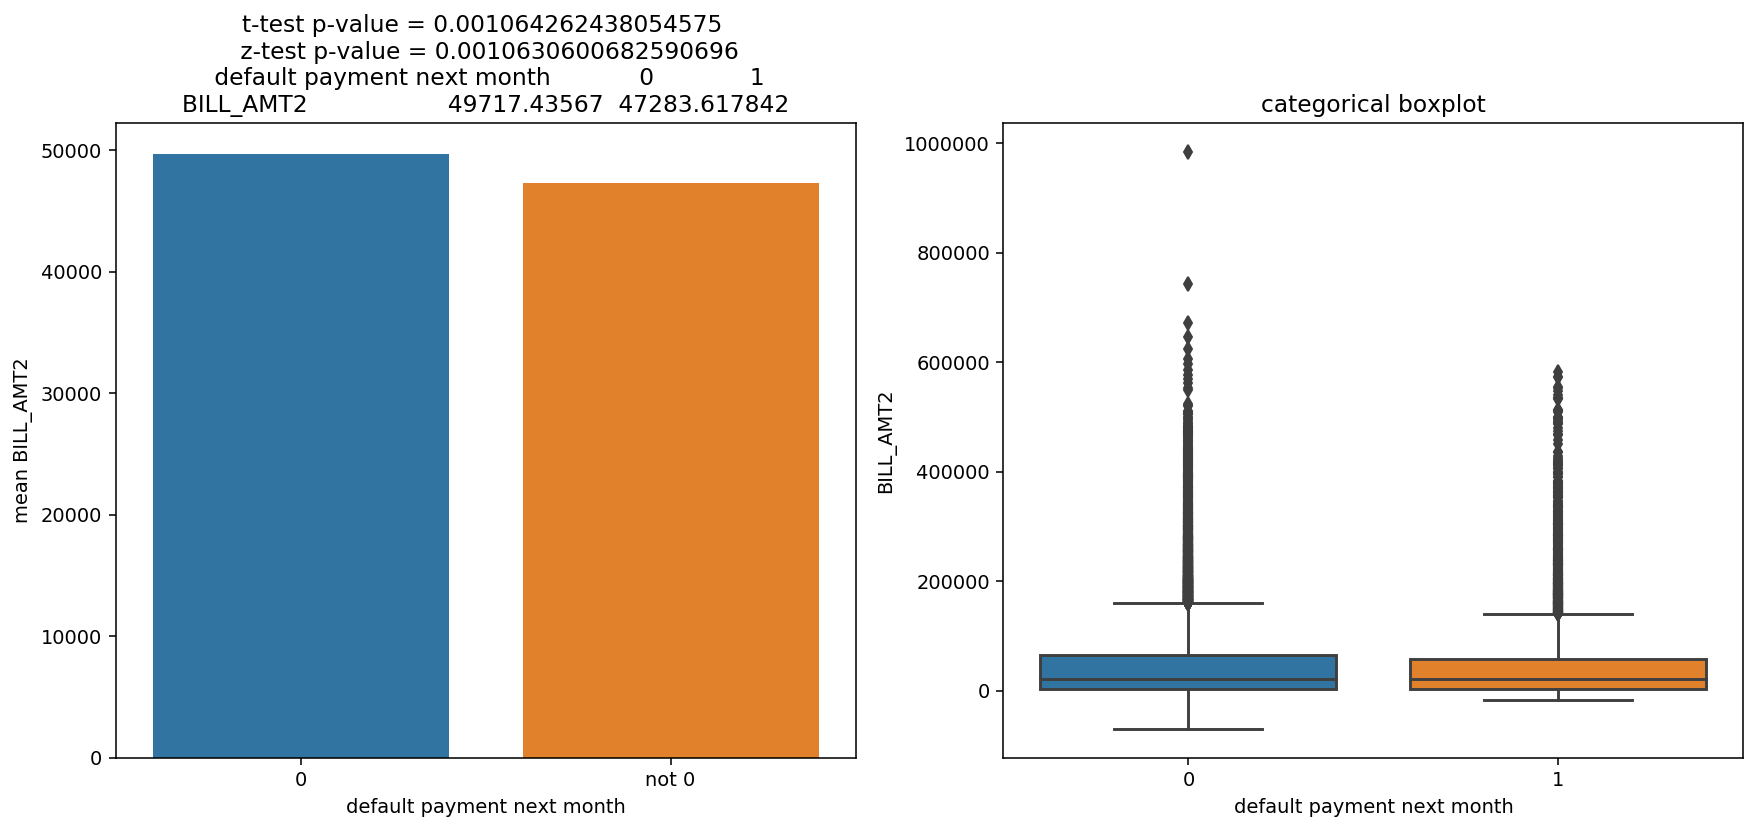

In [42]:
Bivariate_cont_cat(data, 'BILL_AMT2' , 'default payment next month' , 0)

- 4.8% Percent Change

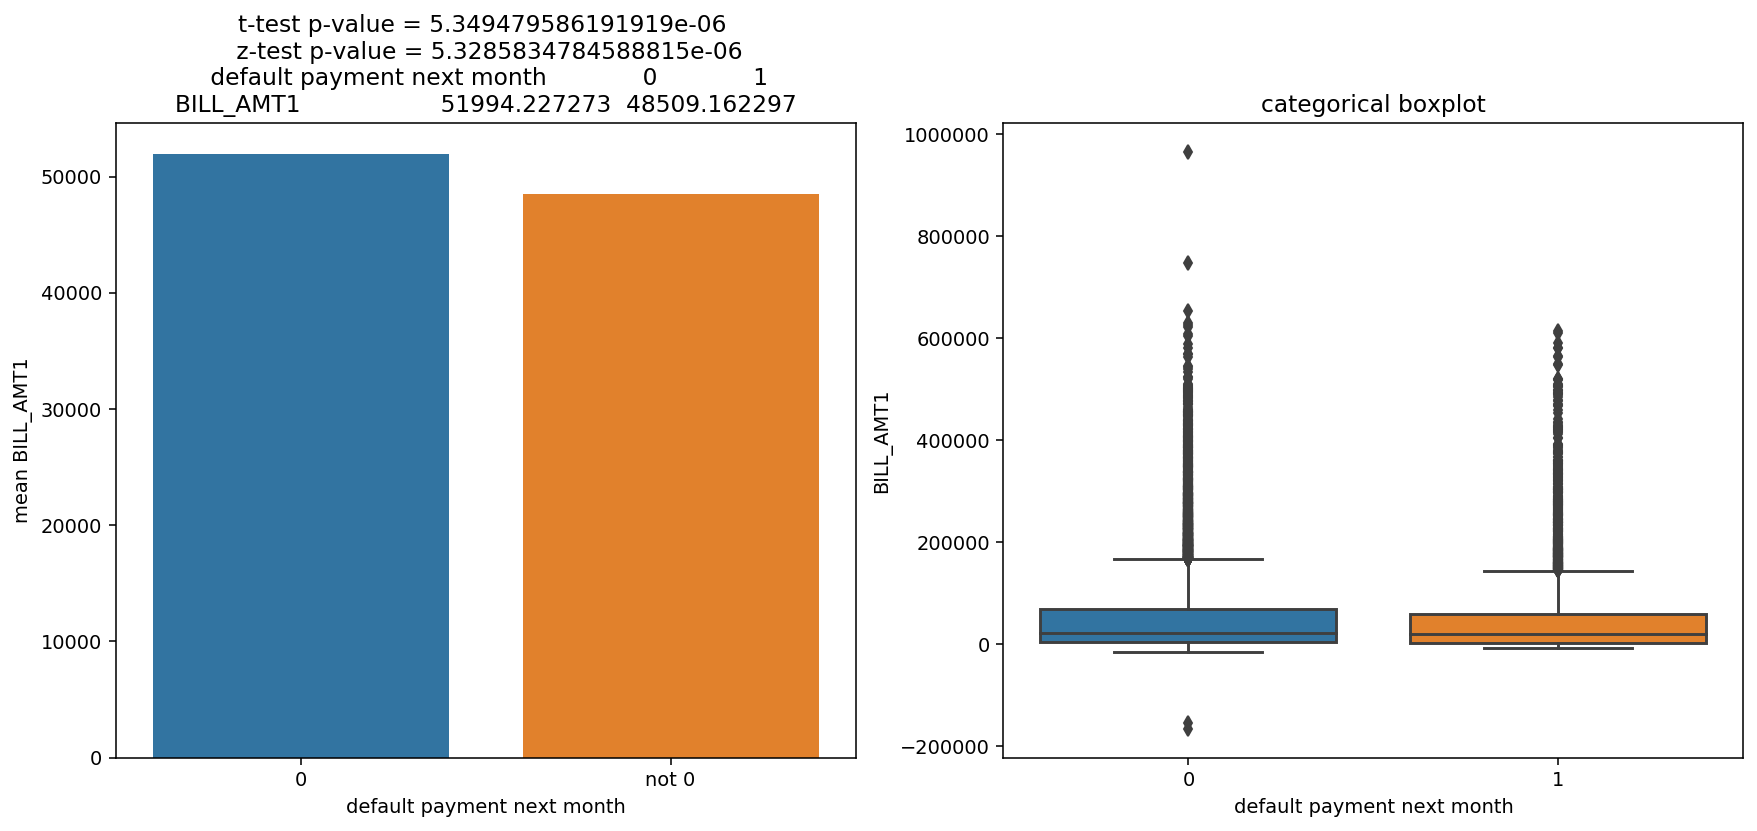

In [43]:
Bivariate_cont_cat(data, 'BILL_AMT1' , 'default payment next month' , 0)

- 6% Percent

### **UNIVARIATE HYPO TO CHECK**
>- check behavior of less payment vali janta
> - SInce there was a trend of paying less amount previoous month so more fraud with coming month if we have less payment history!!
> - September would too have high fraud rate
> - Less credt limit poeple are potential frauds who are paying less evry month

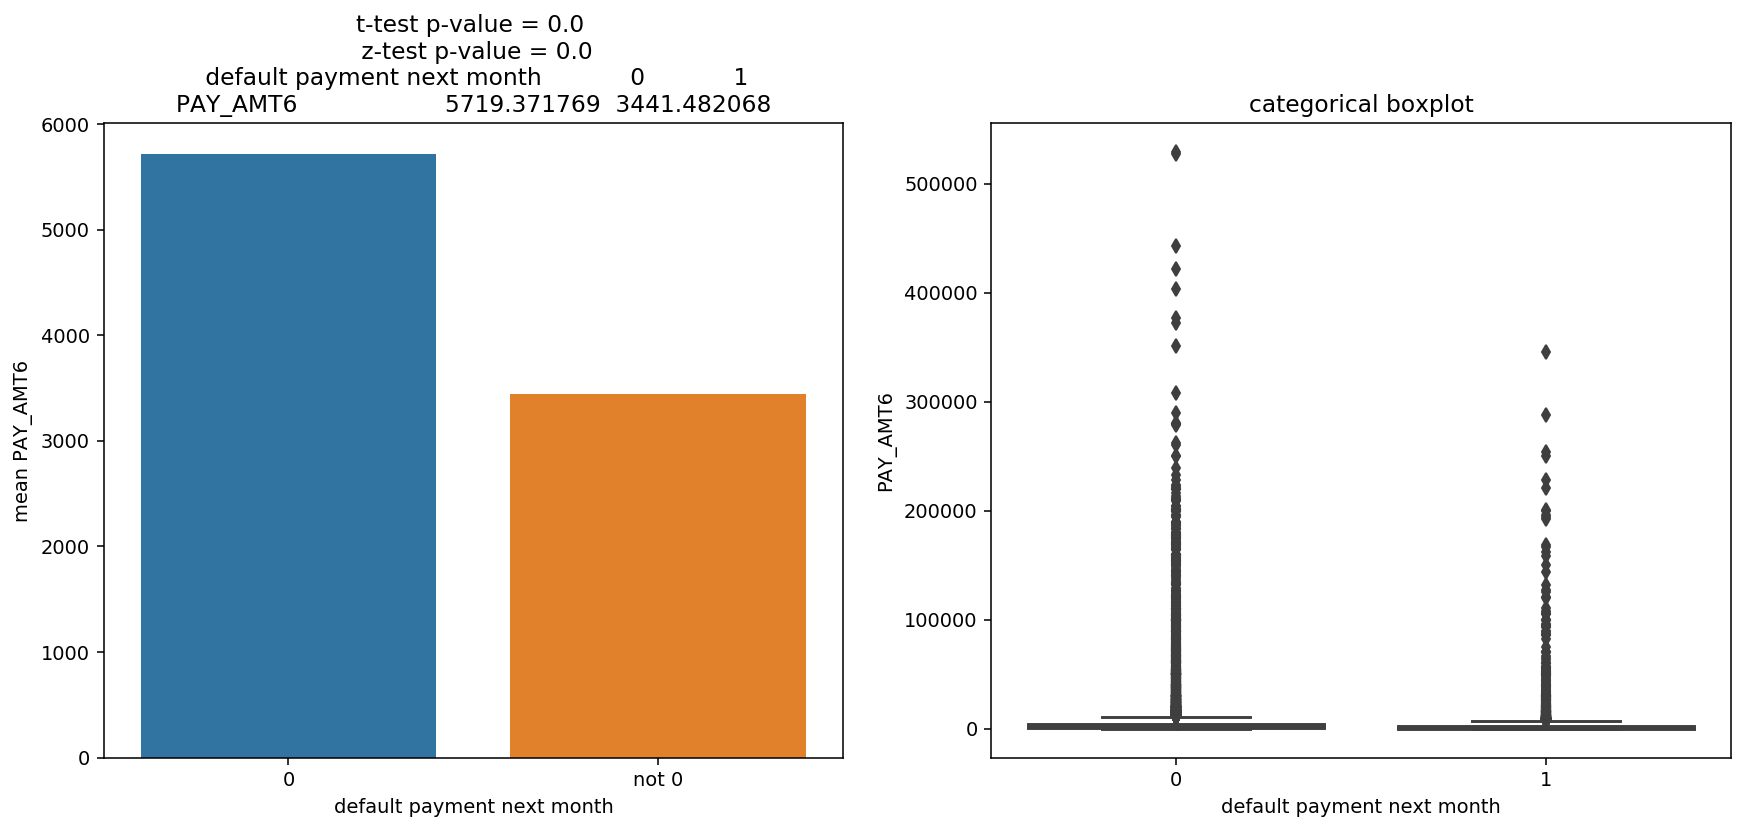

In [44]:
Bivariate_cont_cat(data, 'PAY_AMT6' , 'default payment next month' , 0)

- 39% diff

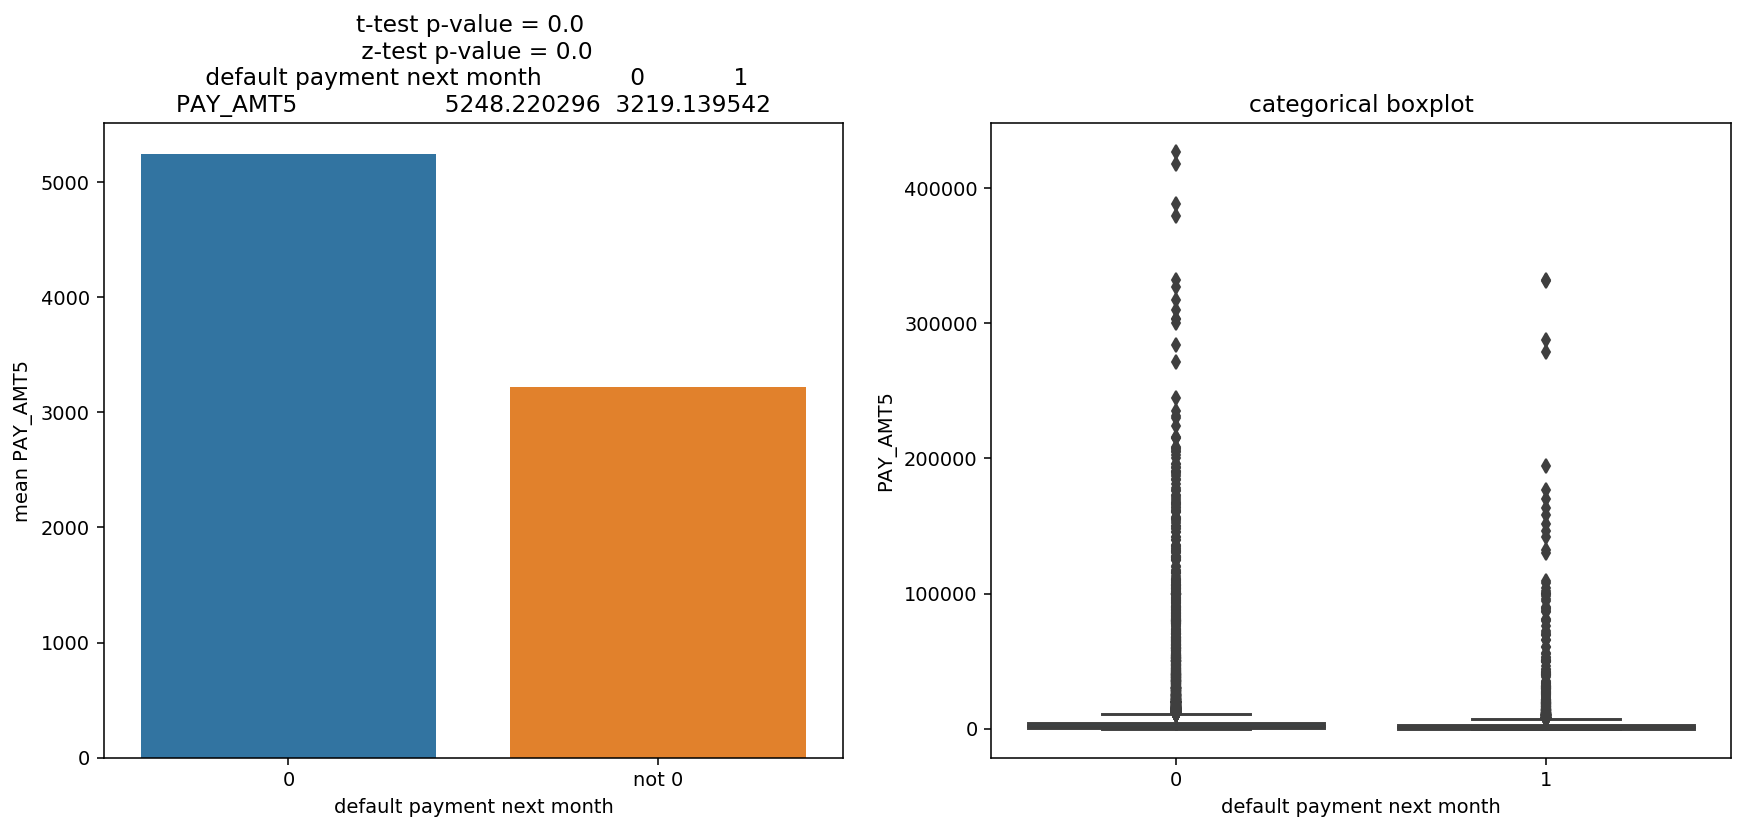

In [45]:
Bivariate_cont_cat(data, 'PAY_AMT5' , 'default payment next month' , 0)

- 38% 

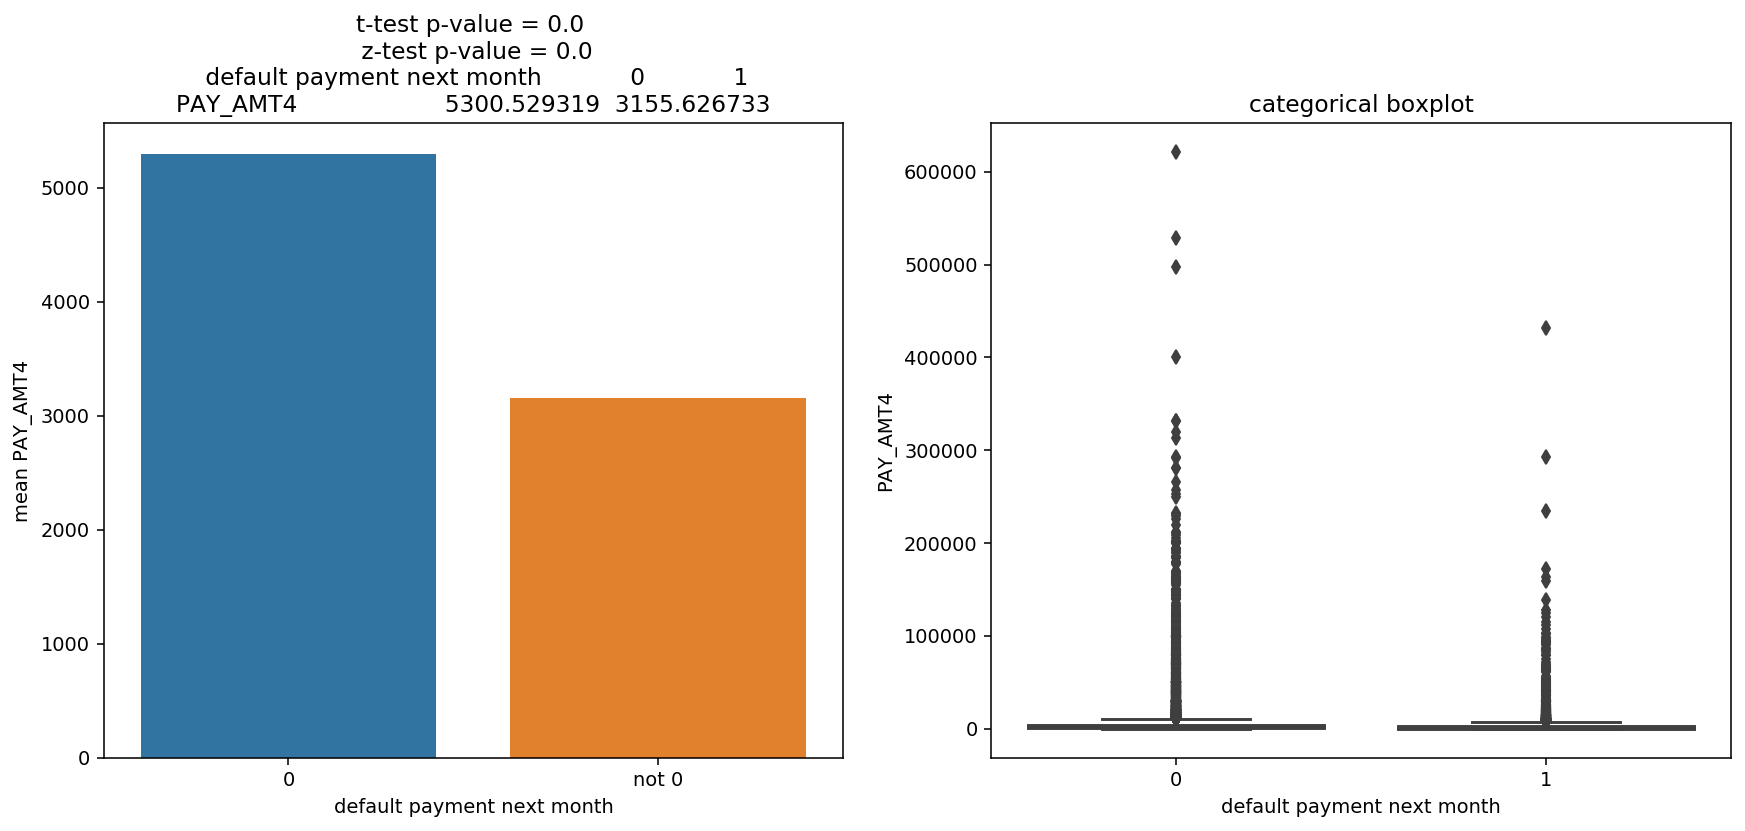

In [46]:
Bivariate_cont_cat(data, 'PAY_AMT4' , 'default payment next month' , 0)

In [77]:
- 40%

SyntaxError: invalid syntax (<ipython-input-77-e1aab177b6f2>, line 1)

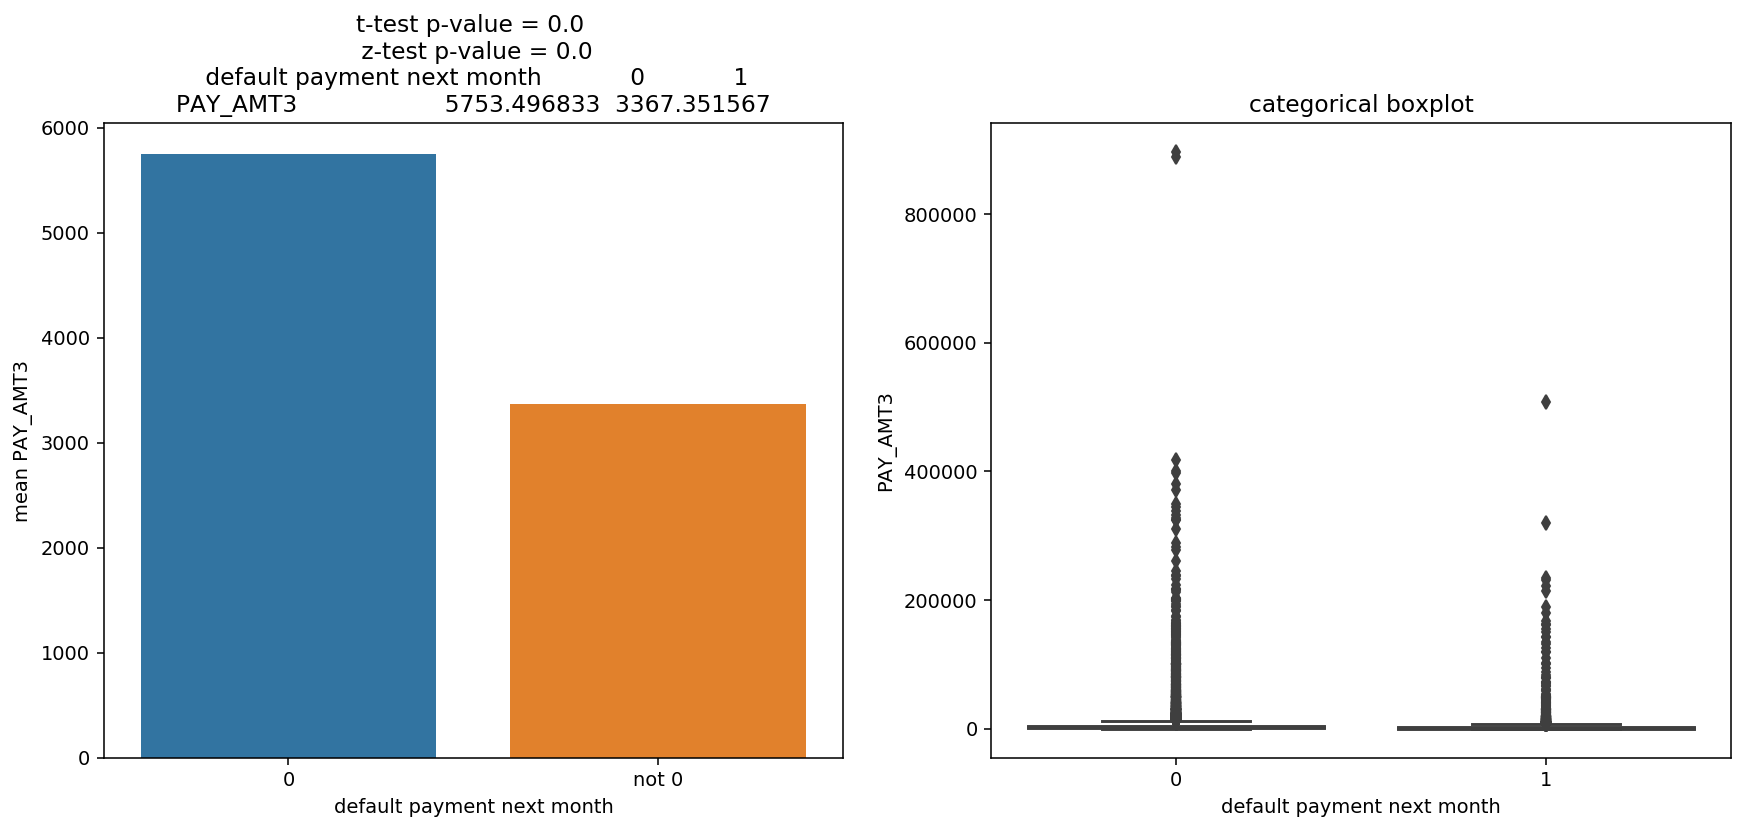

In [47]:
Bivariate_cont_cat(data, 'PAY_AMT3' , 'default payment next month' , 0)

- 41%

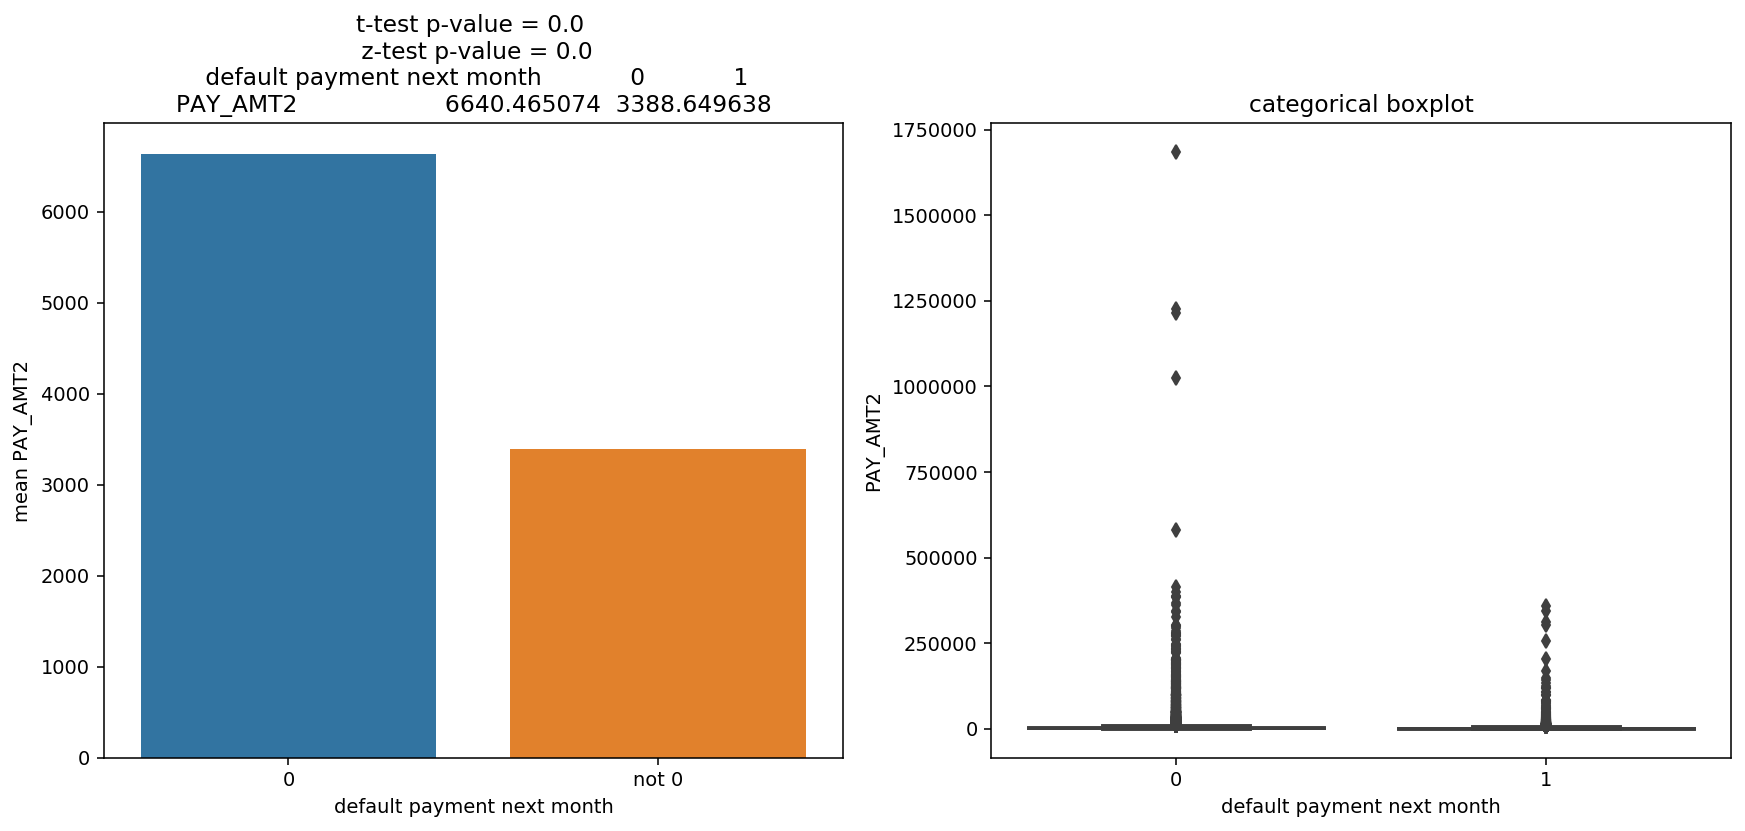

In [48]:
Bivariate_cont_cat(data, 'PAY_AMT2' , 'default payment next month' , 0)

- 48%

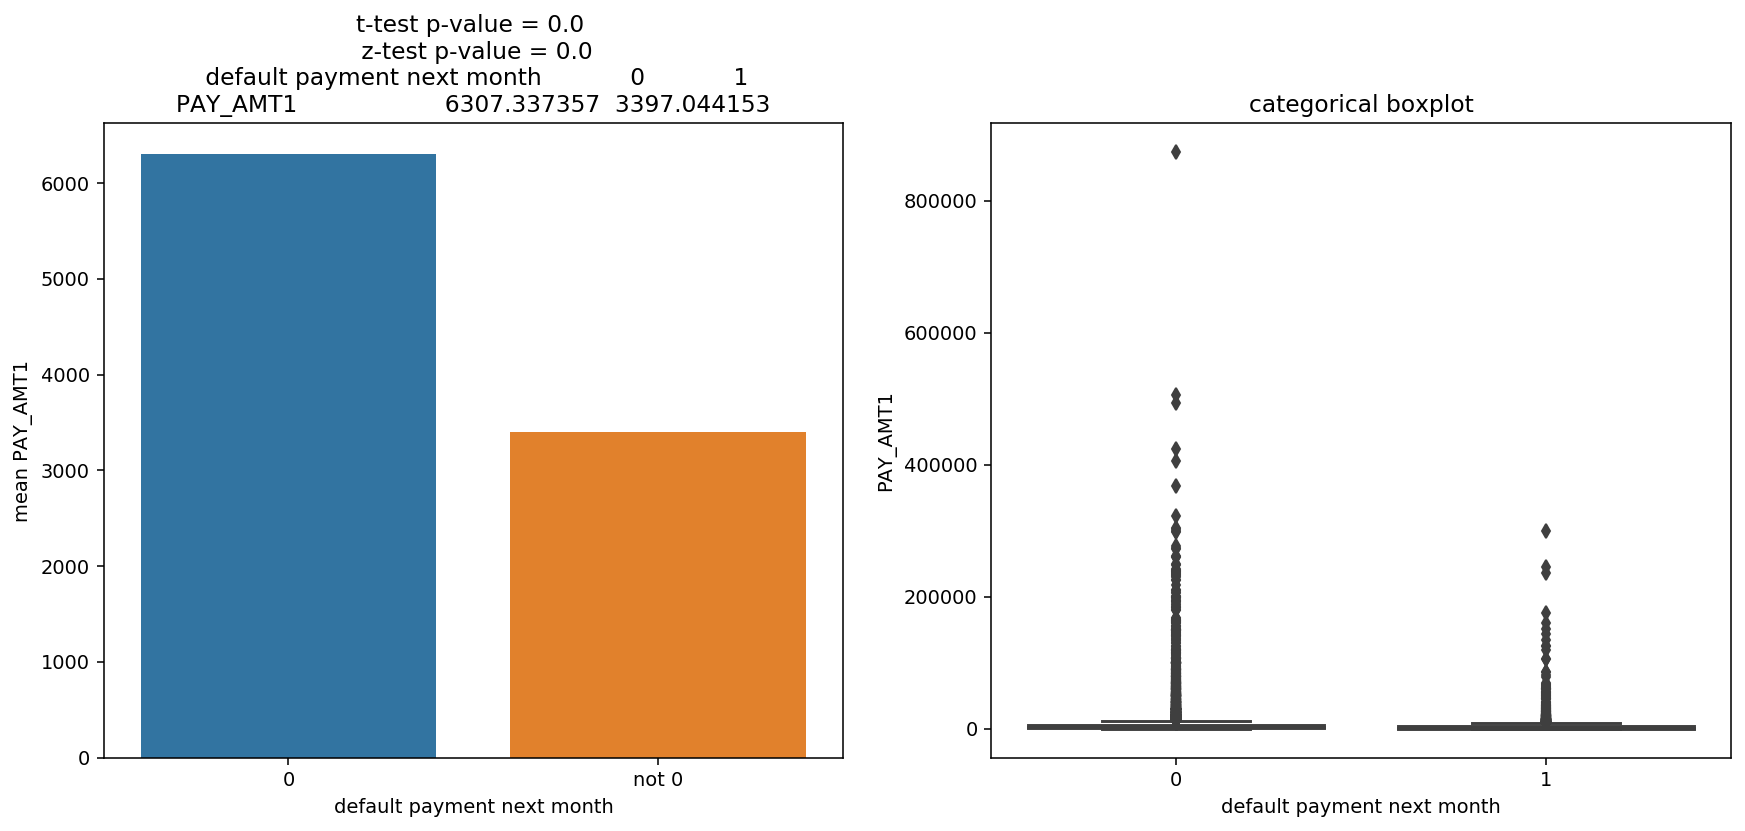

In [49]:
Bivariate_cont_cat(data, 'PAY_AMT1' , 'default payment next month' , 0)

- 46%

In [38]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Education', 'Marriage'],
      dtype='object')

In [41]:
data.groupby(["PAY_0"])[["BILL_AMT1" , "PAY_AMT2"]].median()

,BILL_AMT1,PAY_AMT2
PAY_0,,
-2,1179.0,1025.0
-1,2739.5,1739.5
0,49605.0,2774.0
1,4606.5,1000.0
2,41632.0,1914.0
3,18354.0,37.0
4,31633.0,0.0
5,39752.5,0.0
6,71310.0,0.0


In [43]:
data.groupby(["PAY_2"])[["BILL_AMT2" , "PAY_AMT3"]].median()

,BILL_AMT2,PAY_AMT3
PAY_2,,
-2,0.0,7.0
-1,2035.0,1300.0
0,48428.0,2100.0
1,-338.0,1009.5
2,27689.0,1388.0
3,24481.0,1200.0
4,27371.0,0.0
5,37936.0,0.0
6,77765.0,0.0


In [44]:
data.groupby(["PAY_3"])[["BILL_AMT3" , "PAY_AMT3"]].median()

,BILL_AMT3,PAY_AMT3
PAY_3,,
-2,0.0,0.0
-1,2252.5,1390.0
0,46893.5,2200.0
1,68485.0,4435.0
2,26305.0,1231.0
3,20441.0,0.0
4,31448.0,0.0
5,32308.0,0.0
6,33756.0,0.0


In [47]:
data.groupby(["PAY_4"])[["BILL_AMT4" , "PAY_AMT4"]].median()

,BILL_AMT4,PAY_AMT4
PAY_4,,
-2,0.0,0.0
-1,2156.0,1132.0
0,38465.0,2000.0
1,185766.0,7550.0
2,28380.0,1100.0
3,27332.5,0.0
4,20779.0,0.0
5,22757.0,0.0
6,24579.0,0.0
